## Caracterização meteorologica da área de estudos - Porto Bello
Alunas: Marília Meister e Maria Nathalia

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliando os seguintes pontos:

* Meteorologia de superfície
* Perfil de temperatura
* Superfície - Albedo, razão de Bowen e Rugosidade

##  ITEM 01_METEOROLOGIA DE SUPERFÍCIE
Nesta etapa analisaremos os dados de metar (estação meteorológica em aeroportos) para o período de 01/01/2023 a 01/01/2024. Os dados foram coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR.

* O Boxplot e gráfico de médias, mínimas e máximas foram usados para avaliar:
  - Temperatura;
  - Pressão;
  - Umidade;
  - Cobertura de nuvens.
* A rosa dos ventos foi usada para avaliar:
  - Direção e velocidade do vento.

Ao longo da geração dos gráficos comentarios são feitos e ao final do Item 01 é feita a conclusão final desse item.

In [62]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401
C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\inputs\meteoSuperficie
['metar_2023.csv']


Lembrar que:

ct = altura do topo da nuven
wd = direção do vento
ws = velocidade do vento
hc = altura da cobertura de nuves
ccp = cobertura de nuvens na primeira camada
cco = cobertura de nuvens na camada mais opaca (mais longe)
p = pressão [pasca]
temp = temperatura [°C]
dpTemp = temperatura do ponto de orvalho [°C]
vis = visibiladade
pw = precipitação [o dado é errado]
relh = umidade relativa

------------------------------------------------------Nesta secessão são apresentados os dados baixados no site mencionado-------------------------------------------------------

In [63]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

display (metSuperficie)
print(type(metSuperficie))

,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
0,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.66,25.0,22.0,NaN,0,83.44
1,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.65,25.0,22.0,NaN,0,83.44
2,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.65,25.0,22.0,NaN,0,83.44
3,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.65,25.0,22.0,NaN,0,83.44
4,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.66,25.0,22.0,NaN,0,83.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.65,25.0,18.0,NaN,0,65.12
8754,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.65,24.0,18.0,NaN,0,69.14
8755,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.65,24.0,18.0,NaN,0,69.14
8756,31,12,2023,22,NaN,190.0,2.057776,2438.4,6.0,6.0,1009.65,23.0,19.0,NaN,0,78.19


<class 'pandas.core.frame.DataFrame'>


---------------------------------------------------------Nesta secessão os dados são organizados com uma coluna nova de Datetime------------------------------------------------

In [64]:
# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.66,25.0,22.0,NaN,0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.65,25.0,22.0,NaN,0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.65,25.0,22.0,NaN,0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.65,25.0,22.0,NaN,0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.66,25.0,22.0,NaN,0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.65,25.0,18.0,NaN,0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.65,24.0,18.0,NaN,0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.65,24.0,18.0,NaN,0,69.14,2023-12-31 21:00:00


-----------------Nesta secessão os dados de temperatura, pressão, umidade relativa e cobertura de nuvens são plotados nos gráfico de linha-----------------------------------



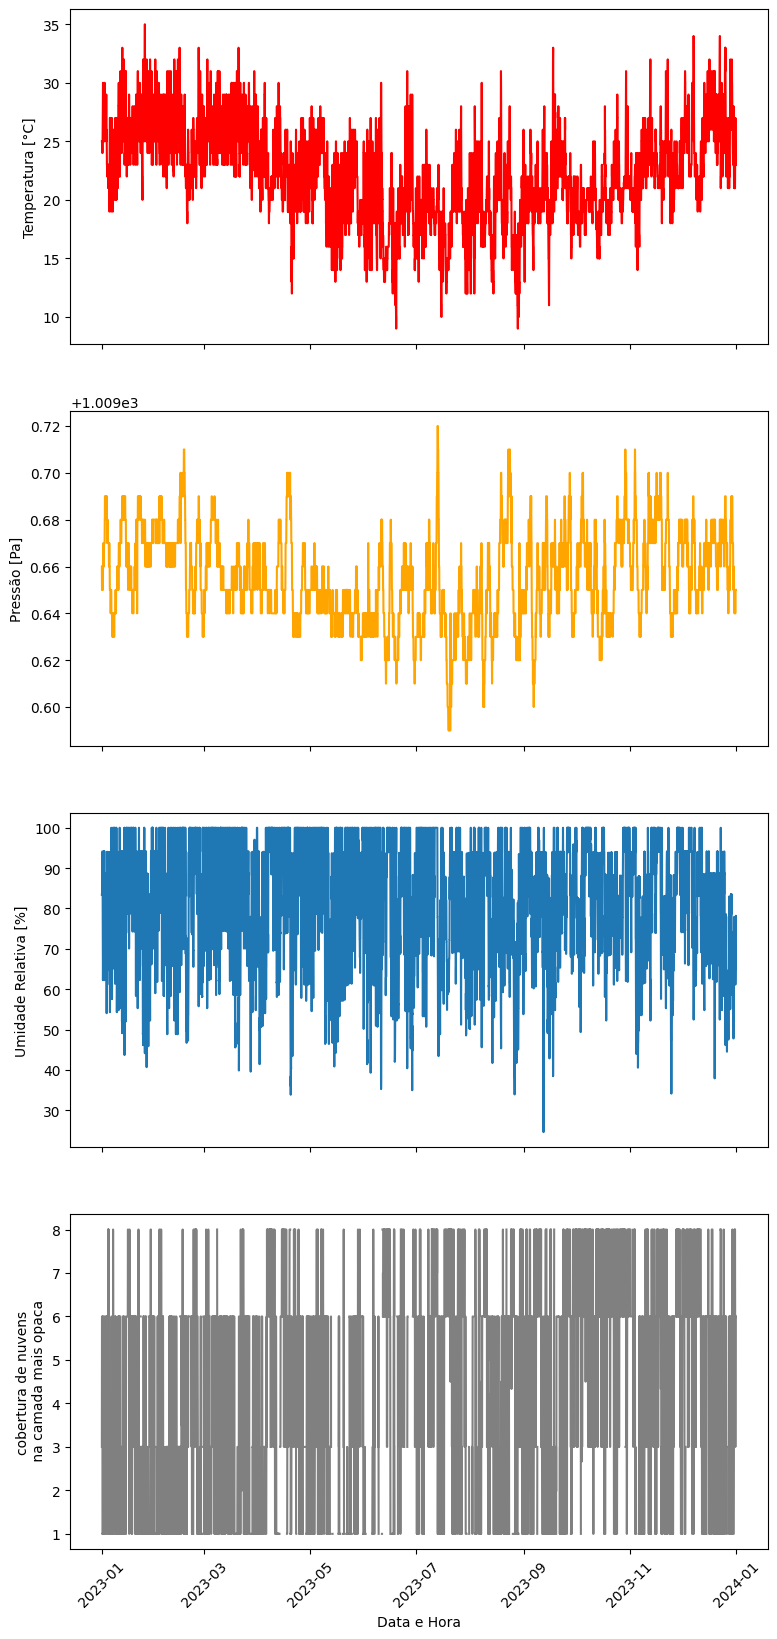

In [65]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, sharex=True, figsize=(9,20))
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color='red')
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color='orange')
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color='gray')
ax[3].tick_params(axis='x', rotation=45)

# Adicionar nomes aos eixos
ax[0].set_ylabel('Temperatura [°C]')
ax[1].set_ylabel('Pressão [Pa]')
ax[2].set_ylabel('Umidade Relativa [%]')
ax[3].set_ylabel('cobertura de nuvens\n na camada mais opaca')

# Nome do eixo x
ax[3].set_xlabel('Data e Hora')

# Adicionar espaço entre os subplots verticalmente
plt.subplots_adjust(hspace=0.2)

plt.show()

------------------------------------------Nesta secessão os dados anteriores foram analisados através de gráficos boxplot------------------------------------

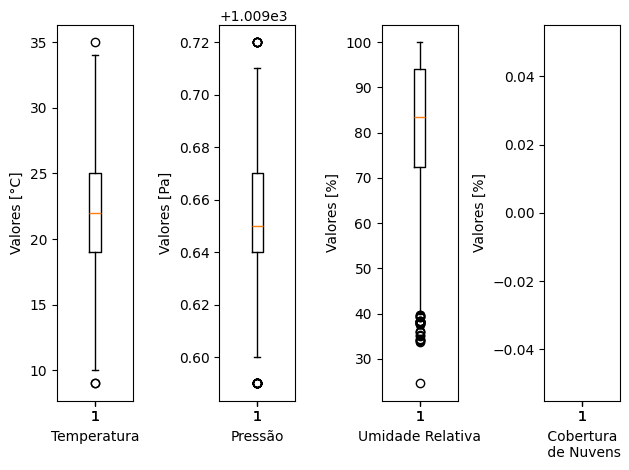

In [66]:
# Fazendo boxplot das variáveis para o ano inteiro - dados brutos
fig, ax = plt.subplots(1, 4, sharex=True)

# Plotando os boxplots e adicionando rótulos
ax[0].boxplot(metSuperficie['temp'])
ax[0].set_xlabel('Temperatura')
ax[0].set_ylabel('Valores [°C]')

ax[1].boxplot(metSuperficie['p'])
ax[1].set_xlabel('Pressão')
ax[1].set_ylabel('Valores [Pa]')

ax[2].boxplot(metSuperficie['relh'])
ax[2].set_xlabel('Umidade Relativa')
ax[2].set_ylabel('Valores [%]')

ax[3].boxplot(metSuperficie['cco'])
ax[3].set_xlabel(' Cobertura \n de Nuvens')
ax[3].set_ylabel('Valores [%]')

# Ajustando layout
plt.tight_layout()
plt.show()


Comentário: Os dados aqui apresentados, são dados brutos. Para obter uma melhor vizualização do box plot é preciso remover os valores entendidos com 'NaNs' 
na tabela. Dessa maneira, os dados apresentados abaixo passaram por um tratamento, removendo-se os valores acima do percentil 95%

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.7
O percentil 99 da Umidade Relativa é:100.0
O percentil 99 da Cobertura de Nuvens é:8.0


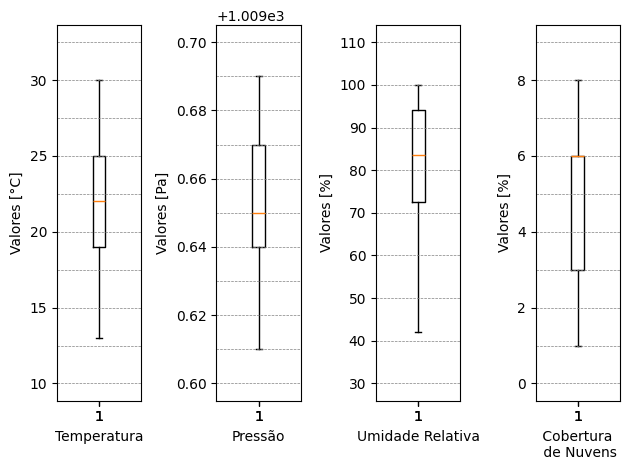

In [67]:
# Removendo valores acima do percentil 95°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:'+str(temp99))

p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:'+str(p99))

#print(metSuperficie['temp']<temp99)
relh99 = np.nanpercentile(metSuperficie['relh'],99)
print('O percentil 99 da Umidade Relativa é:'+str(relh99))

cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da Cobertura de Nuvens é:'+str(cco99))


fig,ax = plt.subplots(1,4,sharex=True)

ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[0].set_xlabel('Temperatura')
ax[0].set_ylabel('Valores [°C]')
for val in ax[0].get_yticks():
    ax[0].axhline(y=val, color='gray', linestyle='--', linewidth=0.5)  # Adicionando linhas horizontais


ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[1].set_xlabel('Pressão')
ax[1].set_ylabel('Valores [Pa]')
for val in ax[1].get_yticks():
    ax[1].axhline(y=val, color='gray', linestyle='--', linewidth=0.5)  # Adicionando linhas horizontais
    

ax[2].boxplot(metSuperficie['relh'][(metSuperficie['relh']<p99) & 
              (metSuperficie['relh']>np.percentile(metSuperficie['relh'],0.5))])
ax[2].set_xlabel('Umidade Relativa')
ax[2].set_ylabel('Valores [%]')
for val in ax[2].get_yticks():
    ax[2].axhline(y=val, color='gray', linestyle='--', linewidth=0.5)  # Adicionando linhas horizontais

ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])
ax[3].set_xlabel(' Cobertura \n de Nuvens')
ax[3].set_ylabel('Valores [%]')
for val in ax[3].get_yticks():
    ax[3].axhline(y=val, color='gray', linestyle='--', linewidth=0.5)  # Adicionando linhas horizontais


# Ajustando layout
plt.tight_layout()
plt.show()

Comentário sobre os resultados:

* Temperatura: A temperaruta mediana se encontra próxima de 21 °C. Para Florianópolis essa temperatura é razoável. 
* Pressão: O gráfico possui variabilidade, porém com uma variação baixa, na casa dos decimais. Isso ocorre porque a proximidade do oceano pode atenuar as mudanças rápidas na pressão atmosférica
* Umidade Relativa: A distribuição dos dados ao redor da mediana é aproximadamente simétrico. Indicando que os valores da umidade relativa são igualmente dispersos tanto para valores abaixo da mediana quanto para valores acima dela.
* Cobertura de Nuvens: Os dados de cobertura de nuves são assimetricos negativos, uma vez que a mediana se sencontra extremamanete
próximo ao terceiro quartil. Como a mediana está muito próxima do terceiro quartil, isso indica que a maior parte dos dados está concentrada
em valores mais baixos de cobertura de nuvens.

Apesar dos comentários feitos, é preciso lembrar que os valores acima do percentil 95° foram removidos. Portanto, para complementar a avaliação,
os mesmos itens foram avaliados em termos de médias, mínimos e máximos como segue abaixo. 

Nesta secessão é calculado a média, máximo e mínimo dos dados de temperatura, pressão, umidade relativa e cobertura de nuvens. Posteriormente são plotados graficamente----------------------------------------------------------------------------------------------------------------------------

temp                        p                         relh         \
            mean   max   min         mean      max      min       mean    max   
month                                                                           
1      25.676299  35.0  19.0  1009.666129  1009.69  1009.63  80.663591  100.0   
2      25.194486  33.0  18.0  1009.667258  1009.71  1009.63  83.858847  100.0   
3      25.684812  33.0  20.0  1009.658978  1009.69  1009.64  84.513837  100.0   
4      22.009028  30.0  12.0  1009.654236  1009.70  1009.63  84.039667  100.0   
5      20.867608  28.0  13.0  1009.643347  1009.67  1009.62  83.745793  100.0   
6      18.890972  31.0   9.0  1009.642111  1009.68  1009.61  81.214583  100.0   
7      18.273970  28.0  10.0  1009.638118  1009.72  1009.59  82.774395  100.0   
8      18.868392  31.0   9.0  1009.647984  1009.71  1009.60  79.410843  100.0   
9      20.864815  33.0  11.0  1009.655403  1009.70  1009.60  82.819973  100.0   
10     20.192070  31.0  15.0  1009.658669  1009.71  1009.62  83.690795  100.0   
11     22.630737  32.0  14.0  1009.664729  1009.71  1009.63  82.007128  100.0   
12     25.363351  34.0  19.0  1009.664355  1009.69  1009.64  78.382836  100.0   

                   cco            
         min      mean  max  min  
month                             
1      40.69  3.696228  8.0  1.0  
2      46.71  3.606464  8.0  1.0  
3      39.58  3.601520  8.0  1.0  
4      33.85  4.820896  8.0  1.0  
5      40.85  4.059524  8.0  1.0  
6      34.97  5.248333  8.0  1.0  
7      43.42  5.223090  8.0  1.0  
8      33.93  4.548199  8.0  1.0  
9      24.59  4.869908  8.0  1.0  
10     49.37  6.180619  8.0  1.0  
11     34.13  5.000794  8.0  1.0  
12     37.90  4.923720  8.0  1.0

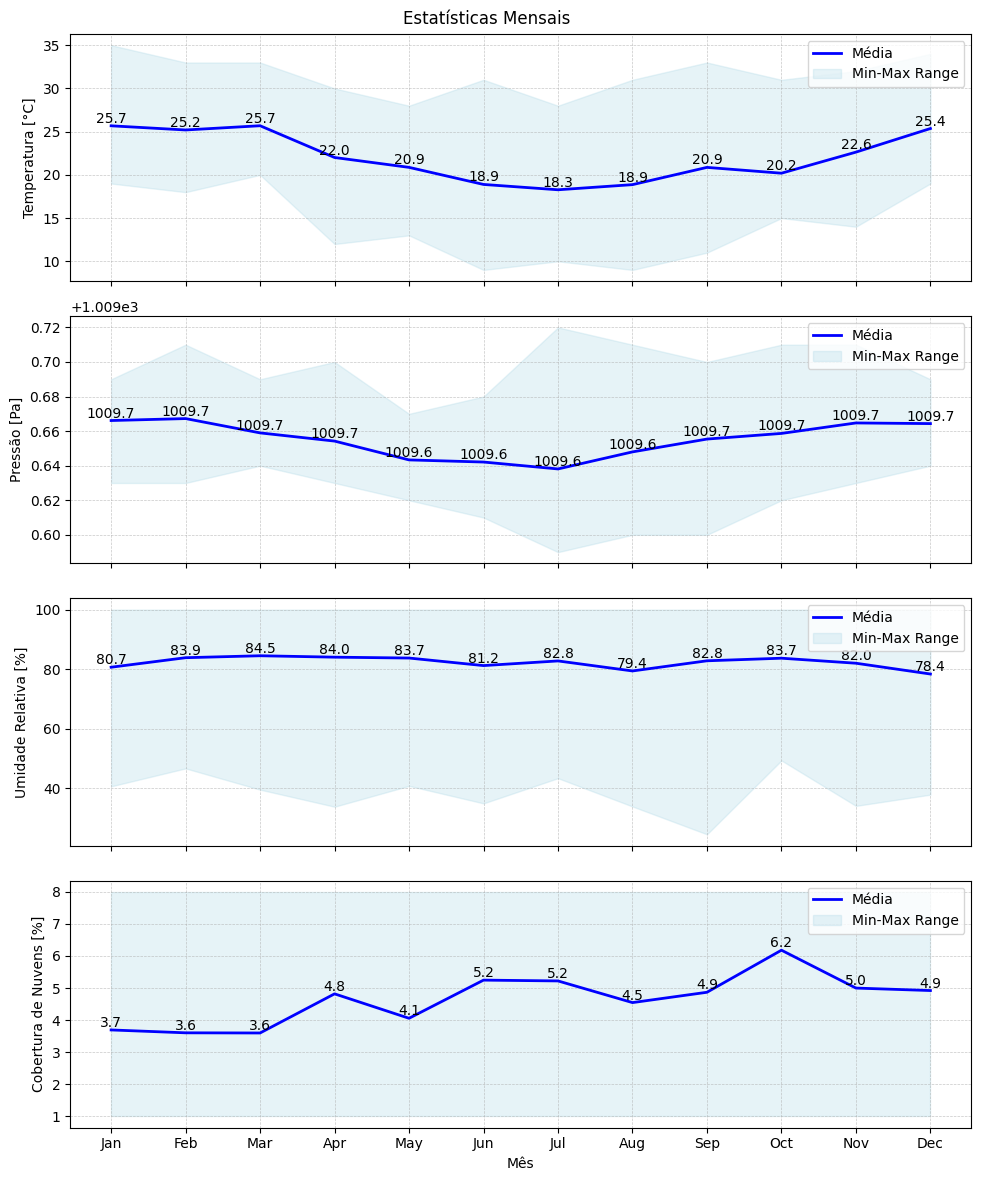

In [68]:
import matplotlib.pyplot as plt

# Calcular a média, máxima e mínima de cada variável por mês
monthly_stats = metSuperficie.groupby('month').agg({'temp': ['mean', 'max', 'min'],
                                                    'p': ['mean', 'max', 'min'],
                                                    'relh': ['mean', 'max', 'min'],
                                                    'cco': ['mean', 'max', 'min']})

# Mostrar as estatísticas calculadas
display(monthly_stats)

# Plotar as estatísticas mensais
fig, axs = plt.subplots(4, figsize=(10, 12), sharex=True)

# Definir o título do gráfico
fig.suptitle('Estatísticas Mensais')

# Lista de rótulos para os eixos y
y_labels = ['Temperatura [°C]', 'Pressão [Pa]', 'Umidade Relativa [%]', 'Cobertura de Nuvens [%]']
# Lista de rótulos para os meses
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Loop através das variáveis
for i, var in enumerate(['temp', 'p', 'relh', 'cco']):
    # Plotar a média 
    axs[i].plot(monthly_stats.index, monthly_stats[var]['mean'], label='Média', color='blue', linestyle='-', linewidth=2)
    
    # Adicionar valores nos pontos da média
    for j, value in enumerate(monthly_stats[var]['mean']):
        axs[i].text(j + 1, value, f"{value:.1f}", color='black', ha='center', va='bottom')
    
    # Plotar a sombra entre a mínima e a máxima
    axs[i].fill_between(monthly_stats.index, 
                        monthly_stats[var]['min'], 
                        monthly_stats[var]['max'], 
                        color='lightblue', alpha=0.3, label='Min-Max Range')
    
    # Adicionar rótulo ao eixo y
    axs[i].set_ylabel(y_labels[i])
    
    # Adicionar legenda
    axs[i].legend()
    
    # Adicionar grade
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Configurar os ticks do eixo x para mostrar todos os meses
axs[-1].set_xticks(range(1, 13))
axs[-1].set_xticklabels(months)

# Adicionar rótulo ao eixo x
plt.xlabel('Mês')

# Ajustar espaço entre os subplots
plt.tight_layout()
# Mostrar o gráfico
plt.show()

Comentários sobre os resultados:
* Temperatura e Pressão: Nota-se um comportamento esperado no gráfico e uma relação com o gráfico da pressão. Durante o inverno, a queda nas temperaturas está associada à chegada de frentes frias e sistemas de baixa pressão, que além de reduzir as temperaturas, também diminuem a pressão atmosférica. Esses sistemas trazem ar frio do sul, que é mais denso e tende a descer, substituindo o ar quente e menos denso, resultando em uma queda na temperatura e na pressão

* Umidade Relativa: A umidade relativa do ar variou ao longo do ano com níveis relativamente altos e próximos durante todos os meses. Os valores médios mensais se apresnetam entre 78.4% e 84.5%. Essa alta umidade ao longo do ano é influenciada pela localização costeira onde está localizada a empresa Porto Bello, que é próxima do Oceano Atlântico, contribuindo para um ambiente mais úmido devido à evaporação constante da água do mar.

* Cobertura de nuvens: O resultado se apresentou como esperado. Estudos mostram que a média anual da nebulosidade é relativamente homogênea 
no estado, mas há variações sazonais notáveis. No inverno, a cobertura de nuvens é mais irregular e pode ser influenciada por fenômenos meteorológicos
como frentes frias e massas de ar polares. No verão, as altas temperaturas e a maior incidência de radiação solar provocam um aumento na formação de 
nuvens convectivas, resultando em maior cobertura de nuvens durante o dia. Além disso, A cobertura de nuvens também varia com a altitude e proximidade 
do litoral. As áreas costeiras e regiões de menor altitude tendem a ter uma cobertura de nuvens mais consistente ao longo do ano devido à influência 
marítima.

----------------------------------Nesta sessão é avalaiada a direção e velocidade do vento--------------------------------------------------------------

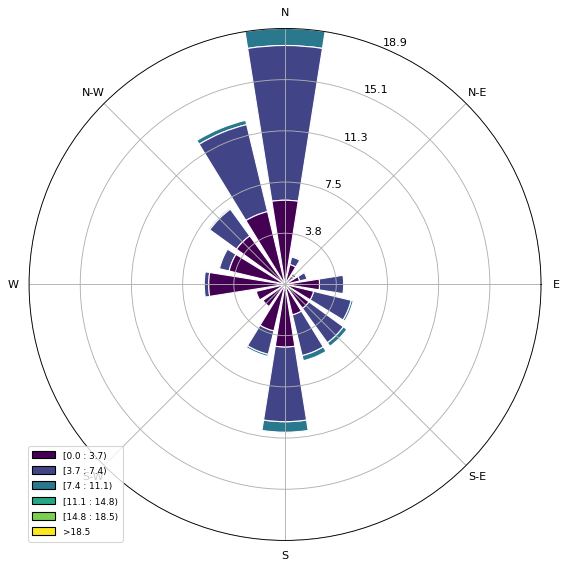

In [69]:
# Criando minha rosa dos ventos para avaliar a direção do vento
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

Discussão:
Cada barra tem uma cor diferente, indicando uma velocidade. Os círculos concêntricos na rosa, por sua vez, ajudam a determinar quanto tempo o vento soprou sob condições em particular

A direção predominante do vento é de Norte com 18,9%. Mas também com outras direções [N-E, E, S-E, S, W e N-W], porém com frequências menores que 15%. A direção N corresponde a circulação de brisa terrestre, devido a proximidade com o Oceano Atlântico. 
Na maior parte do tempo e com maior frequência ele se apresenta na cor azul com velocidade entre 3,7 a 7,4 m/s. 

# Conclusão
Florianópolis apresenta um clima com temperaturas médias próximas de 21°C, variando ao longo do ano devido à influência de frentes frias no inverno e radiação solar intensa no verão. A pressão atmosférica na região é estável, com variação baixa, atribuída à proximidade do oceano, que atenua mudanças abruptas. A umidade relativa do ar é geralmente alta, entre 78.4% e 84.5% em média mensal, influenciada pela localização costeira próxima do Oceano Atlântico. A cobertura de nuvens apresenta variações sazonais significativas, sendo mais irregular no inverno devido a fenômenos meteorológicos. O vento predominante é do Norte, correspondendo à circulação de brisa terrestre, com velocidade média entre 3,7 a 7,4 m/s. Essas condições podem influenciar a qualidade do ar na região, especialmente a umidade e a presença de nuvens, que afetam a dispersão de poluentes e a formação de fenômenos atmosféricos.

## ITEM 02_PERFIL DE TEMPERATURA
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python. Nesste item existem 2 grandes blocos. Para melhor compreensão da leitura, a ordem segue da seguinte maneire:

* Apresentação dos gráficos de perfil e gradiente de temperatura no VERÃO:
    - Primeiro avaliando 5 dias no horário de 12:00 hrs
    - Depois avaliando os mesmos 5 dias no horário de 00:00 horas. 

* Apresentação dos gráficos de perfil e gradiente de temperatura no INVERNO:
     - Primeiro avaliando 5 dias no horário de 12:00 hrs
     - Depois avaliando os mesmos 5 dias no horário de 00:00 horas.

## Nesta secessão é calculado o perfil e gradiente de temperatura para o VERÃO nos dias 01 a 05 de jan 2023 -----------------------------------------------------------------------------------------------

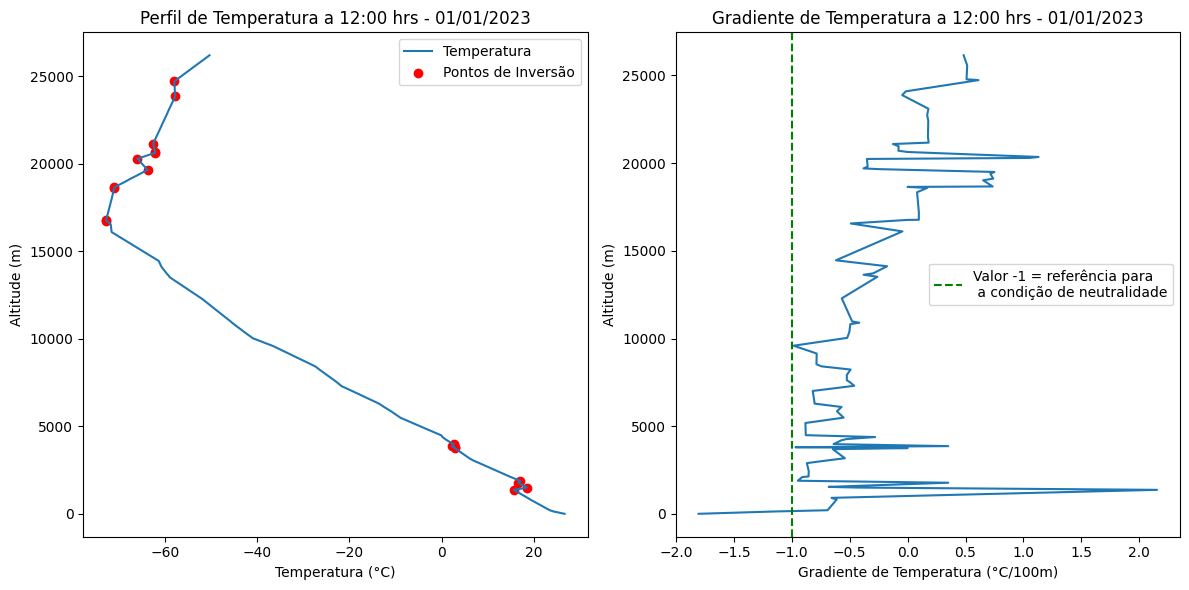

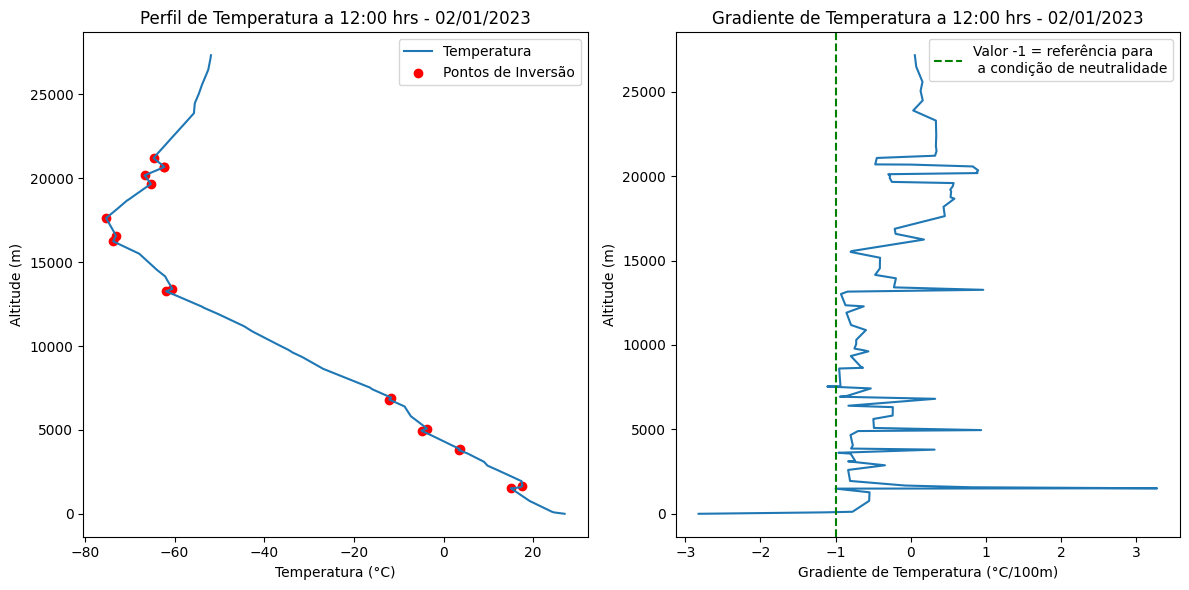

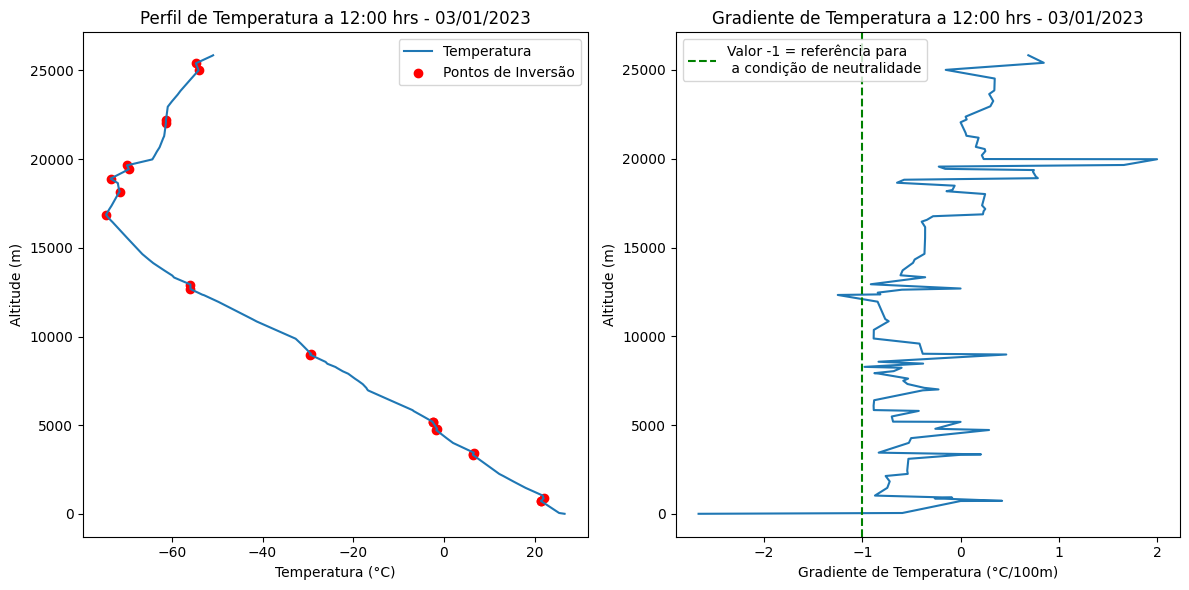

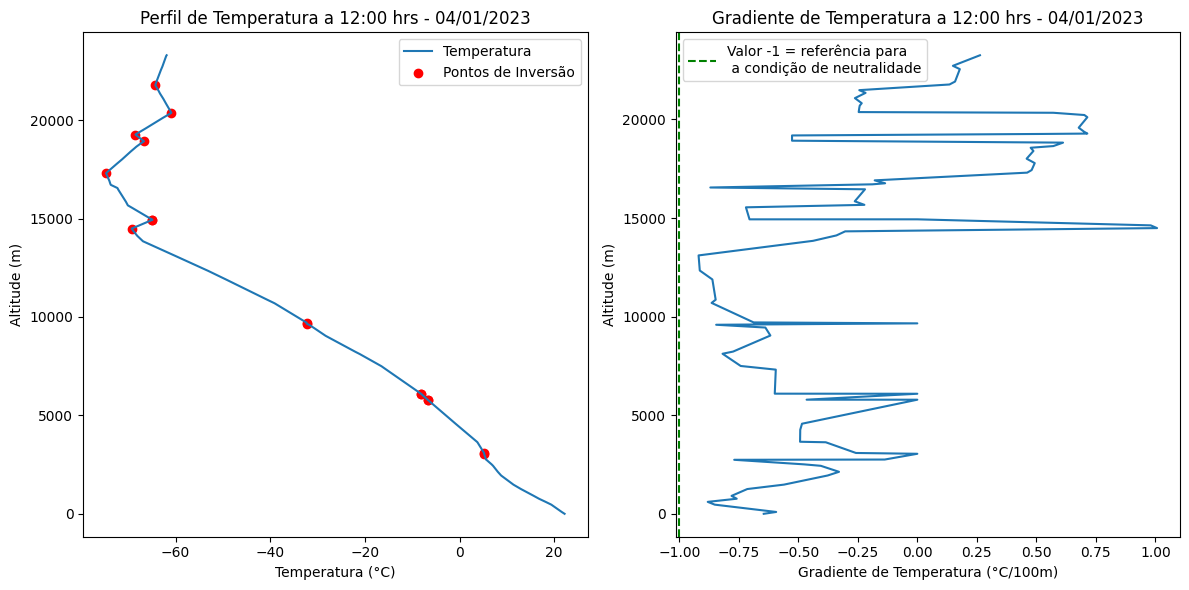

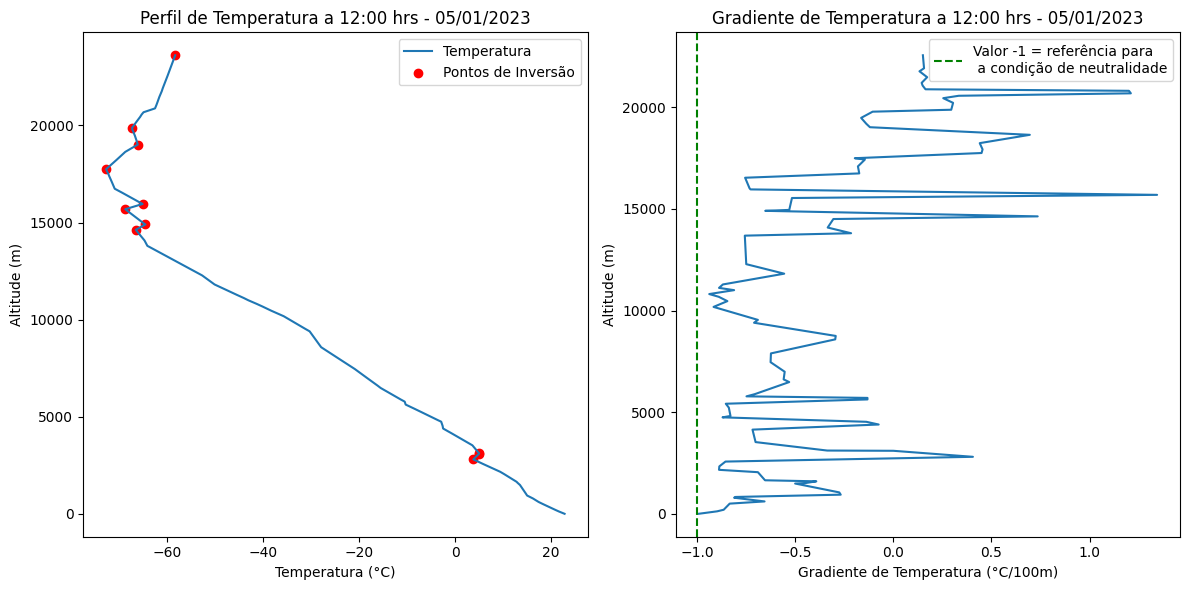

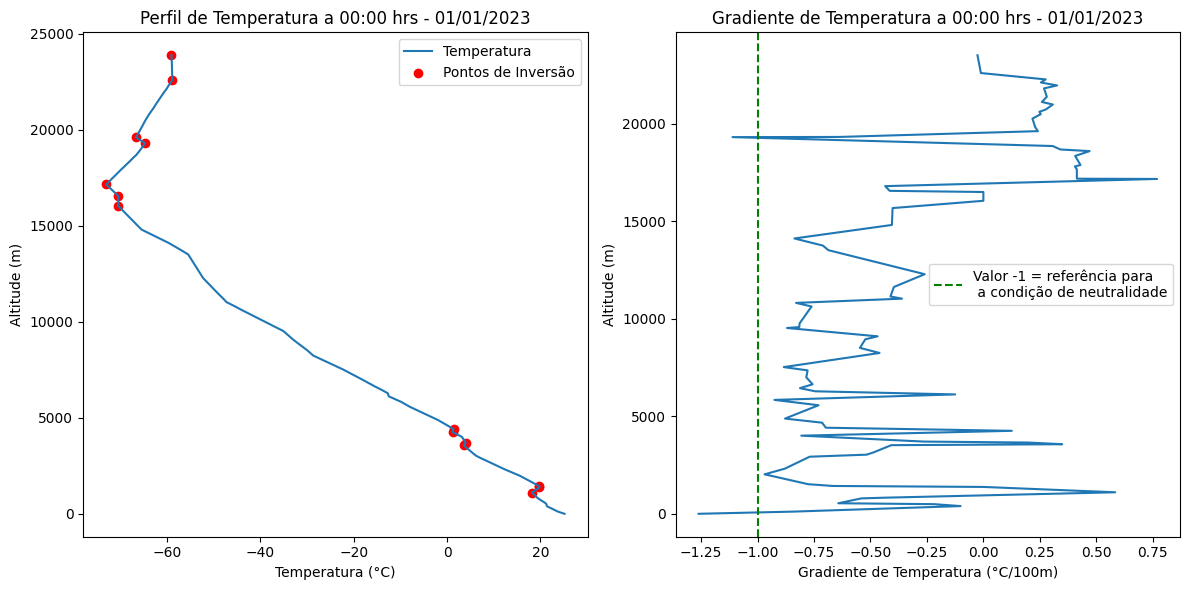

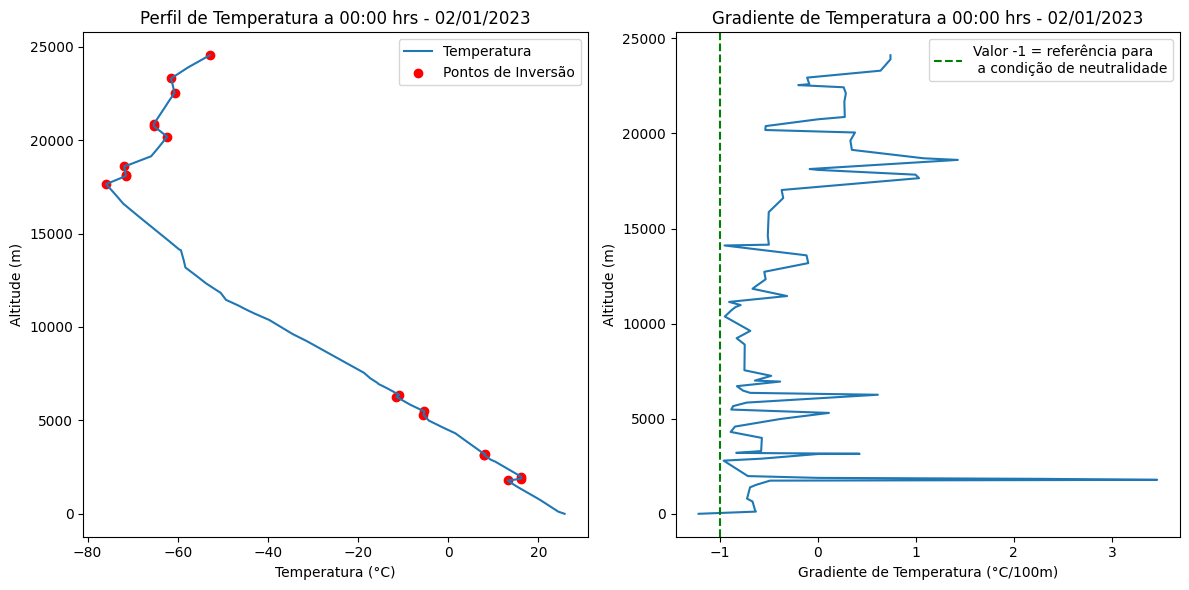

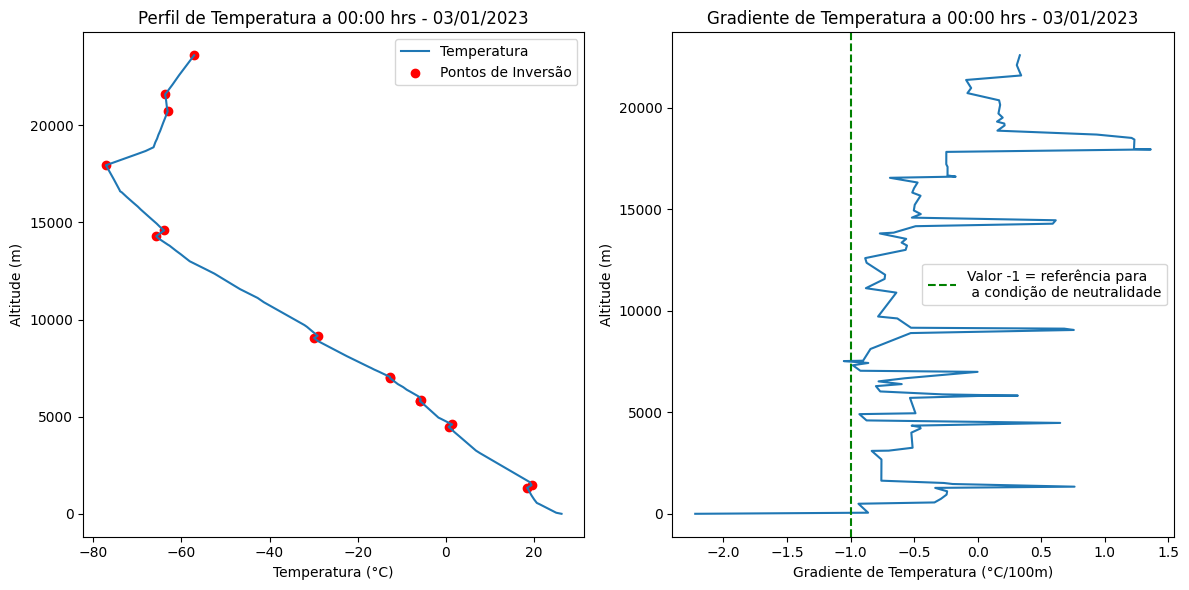

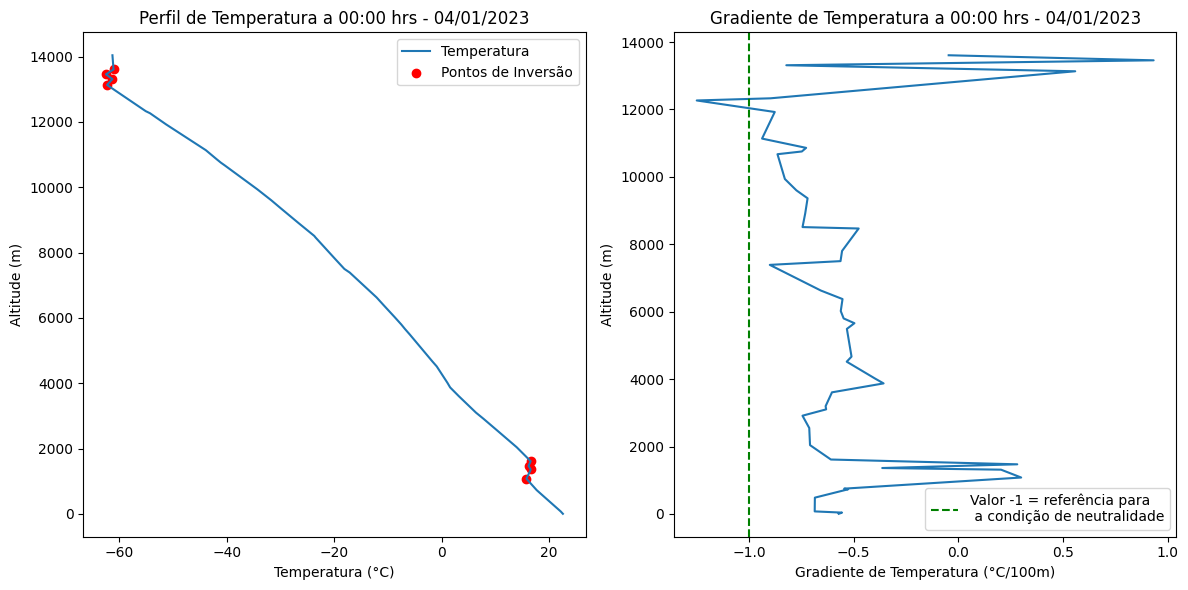

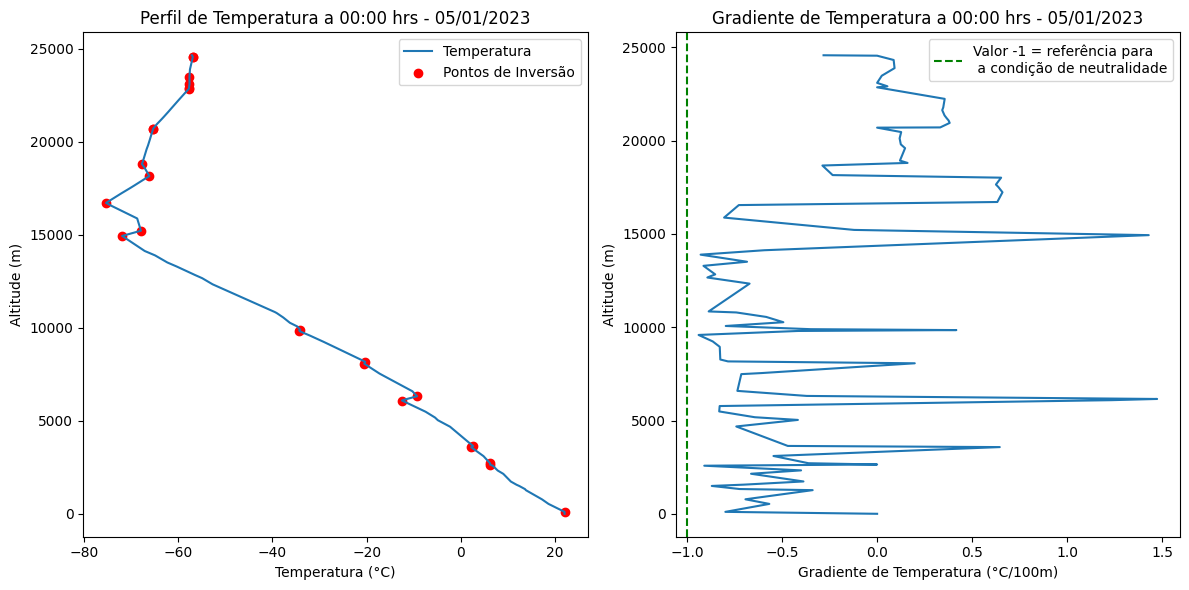

In [73]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir


#-----------------------------------------------------CÓDIGO PARA O HORÁRIO DE 12:00 HORAS------------------------------------------------------------ 
# Função para obter dados e plotar o perfil de temperatura com pontos de inversão e gradiente de temperatura
def plot_temperature_profile_and_gradient(date, station):
    # Extraindo os dados
    df = WyomingUpperAir.request_data(date, station)
    
    # Encontrando pontos de inversão
    temp = df['temperature'].values
    alt = df['height'].values
    pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
    
    # Calculando o gradiente de temperatura
    deltaT = np.diff(df['temperature'])
    deltaZ = np.diff(df['height'])
    dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m
    
    # Fazendo figura do perfil de temperatura com pontos de inversão
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Perfil de temperatura com pontos de inversão
    ax1.plot(temp, alt, label='Temperatura')
    ax1.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
    ax1.set_xlabel('Temperatura (°C)')
    ax1.set_ylabel('Altitude (m)')
    ax1.set_title(f'Perfil de Temperatura a 12:00 hrs - {date.strftime("%d/%m/%Y")}')
    ax1.legend()

    # Gradiente de temperatura
    ax2.plot(dTdZ, df['height'][:-1])
    ax2.axvline(x=-1, color='green', linestyle='--', label='Valor -1 = referência para \n a condição de neutralidade')
    ax2.set_xlabel('Gradiente de Temperatura (°C/100m)')
    ax2.set_ylabel('Altitude (m)')
    ax2.set_title(f'Gradiente de Temperatura a 12:00 hrs - {date.strftime("%d/%m/%Y")}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Data inicial para análise
start_date = datetime(2023, 1, 1, 12)
# Local da análise
station = 'SBFL'

# Gerar gráficos para 5 dias consecutivos
for i in range(5):
    date = start_date + timedelta(days=i)
    plot_temperature_profile_and_gradient(date, station)
#-----------------------------------------------------CÓDIGO PARA O HORÁRIO DE 00:00 HORAS------------------------------------------------------------ 
# Função para obter dados e plotar o perfil de temperatura com pontos de inversão e gradiente de temperatura
def plot_temperature_profile_and_gradient(date, station):
    # Extraindo os dados
    df = WyomingUpperAir.request_data(date, station)
    
    # Encontrando pontos de inversão
    temp = df['temperature'].values
    alt = df['height'].values
    pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
    
    # Calculando o gradiente de temperatura
    deltaT = np.diff(df['temperature'])
    deltaZ = np.diff(df['height'])
    dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m
    
    # Fazendo figura do perfil de temperatura com pontos de inversão
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Perfil de temperatura com pontos de inversão
    ax1.plot(temp, alt, label='Temperatura')
    ax1.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
    ax1.set_xlabel('Temperatura (°C)')
    ax1.set_ylabel('Altitude (m)')
    ax1.set_title(f'Perfil de Temperatura a 00:00 hrs - {date.strftime("%d/%m/%Y")}')
    ax1.legend()

    # Gradiente de temperatura
    ax2.plot(dTdZ, df['height'][:-1])
    ax2.axvline(x=-1, color='green', linestyle='--', label='Valor -1 = referência para \n a condição de neutralidade')
    ax2.set_xlabel('Gradiente de Temperatura (°C/100m)')
    ax2.set_ylabel('Altitude (m)')
    ax2.set_title(f'Gradiente de Temperatura a 00:00 hrs - {date.strftime("%d/%m/%Y")}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Data inicial para análise
start_date = datetime(2023, 1, 1, 0)
# Local da análise
station = 'SBFL'

# Gerar gráficos para 5 dias consecutivos
for i in range(5):
    date = start_date + timedelta(days=i)
    plot_temperature_profile_and_gradient(date, station)

## Nesta secessão é calculado o perfil e gradiente de temperatura para o INVERNO nos dias 20 a 24 de jun 2023 -----------------------------------------------------------------------------------------------

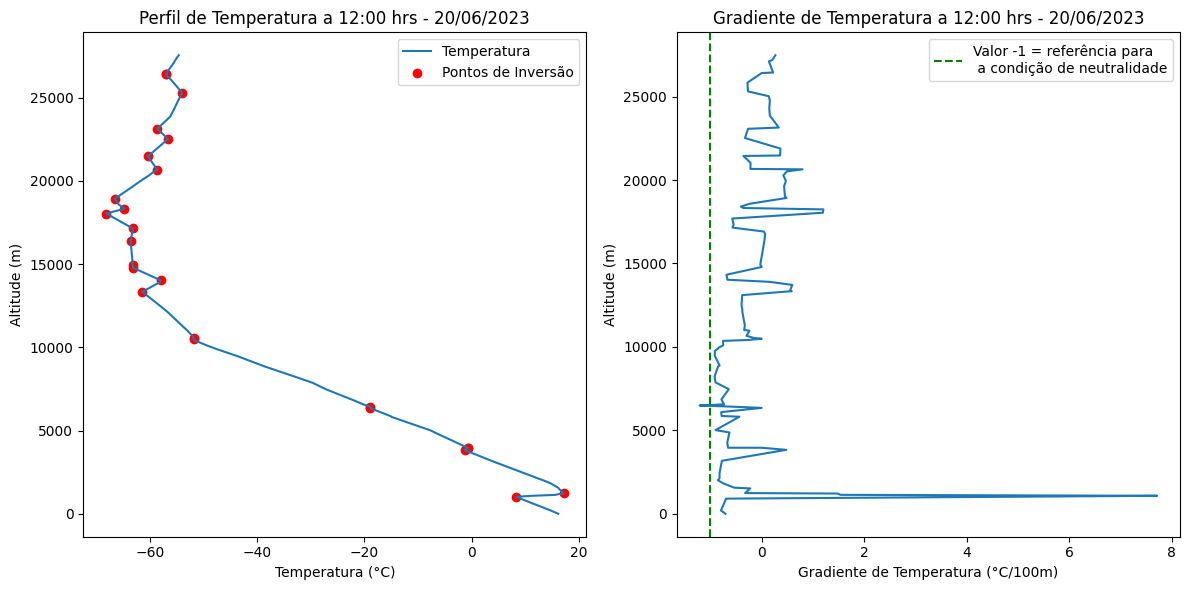

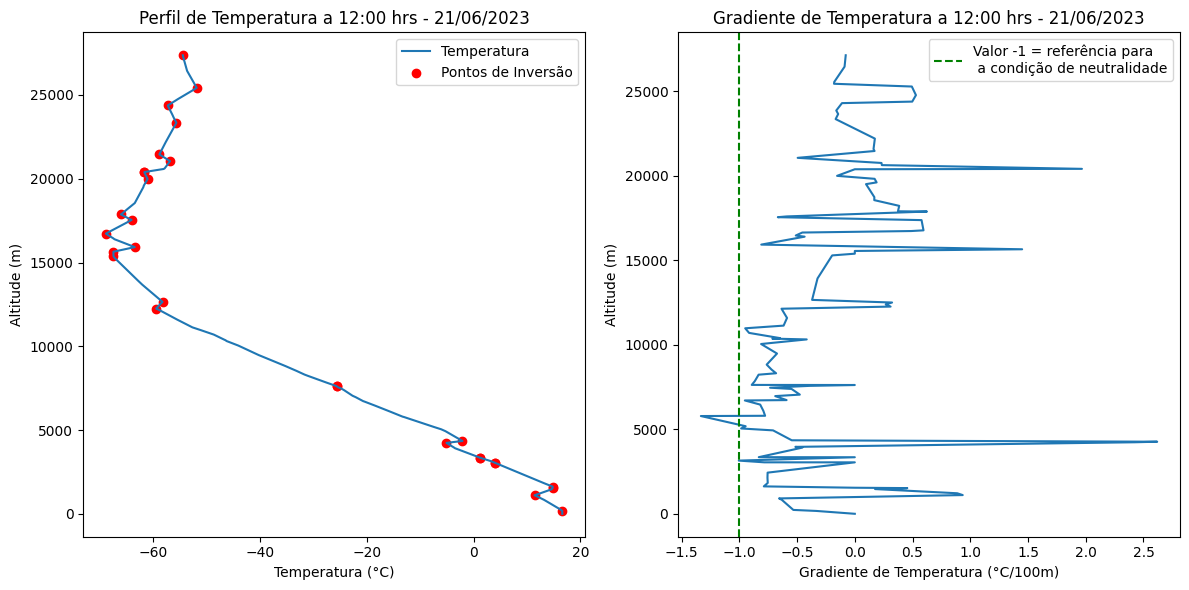

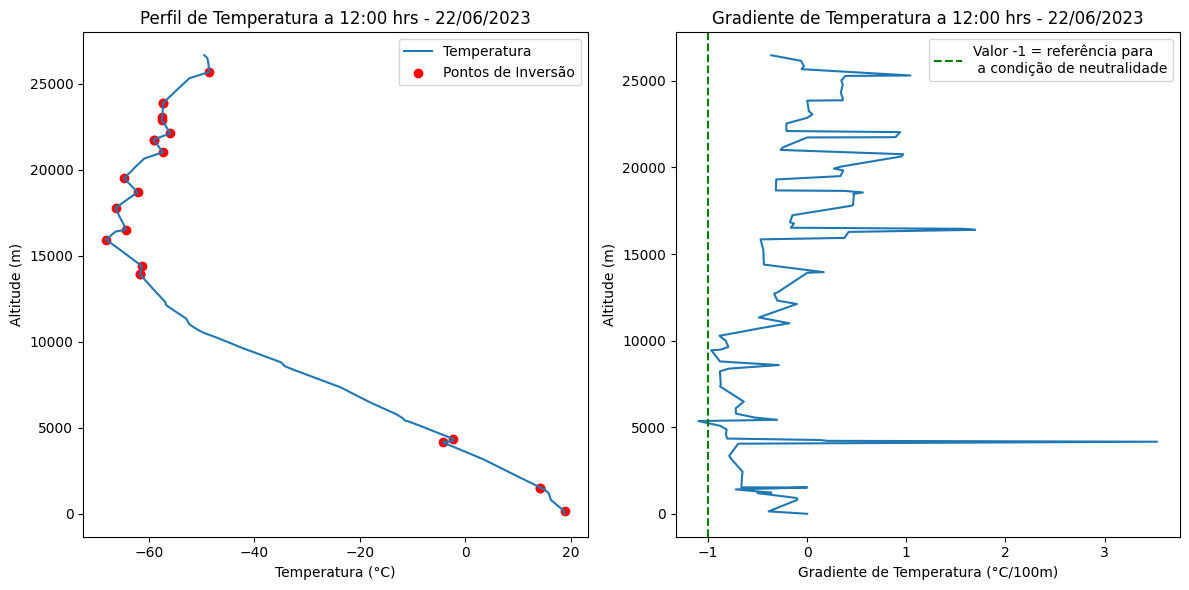

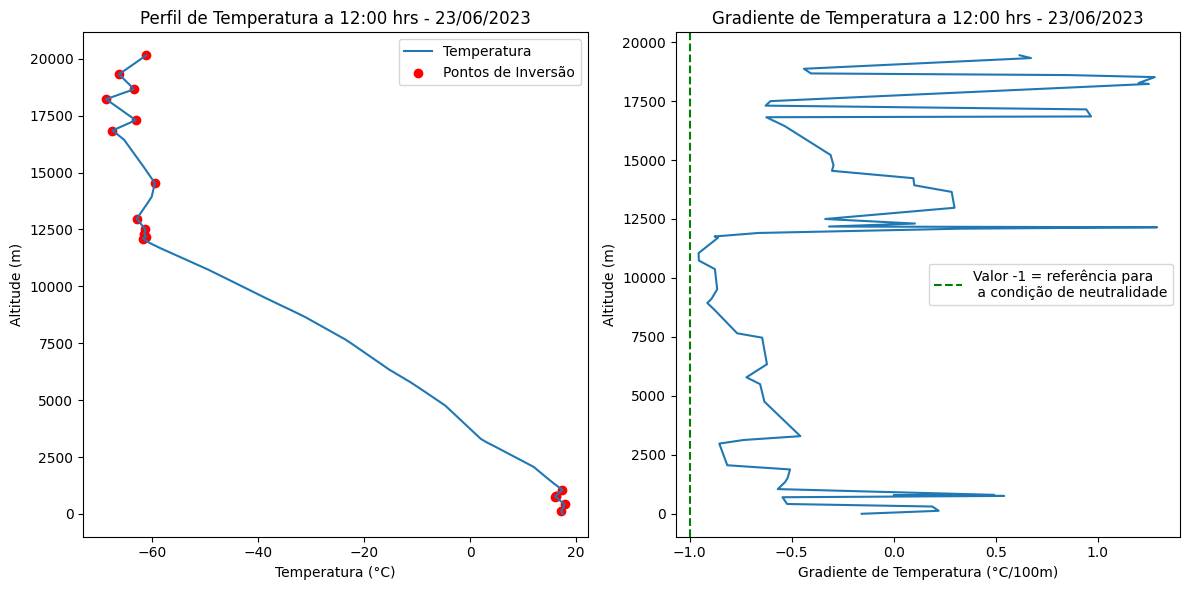

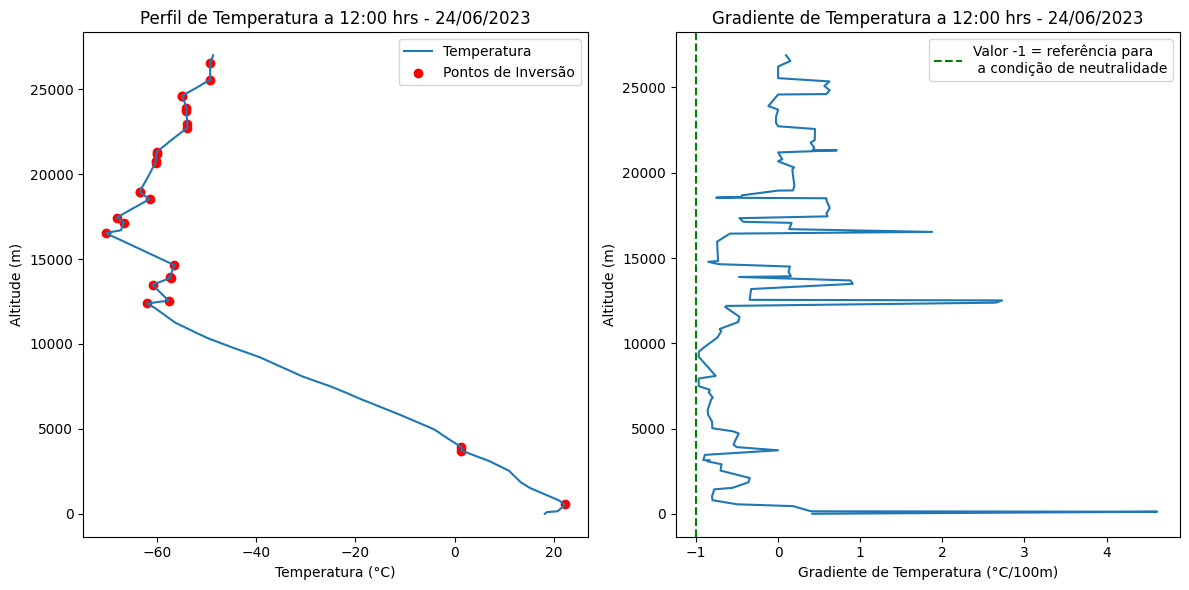

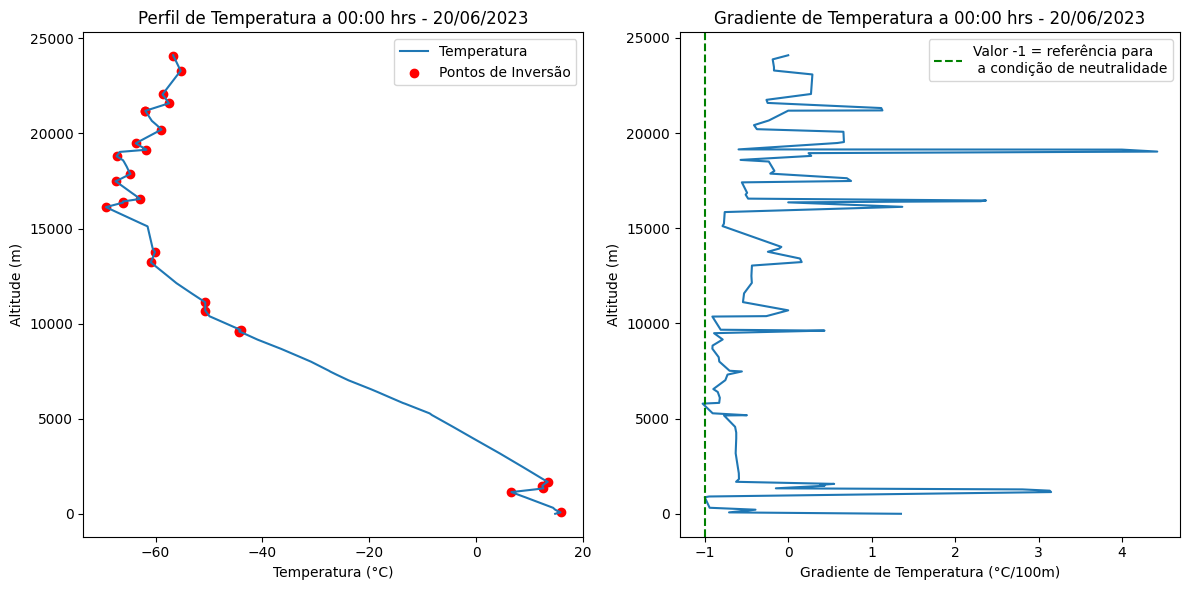

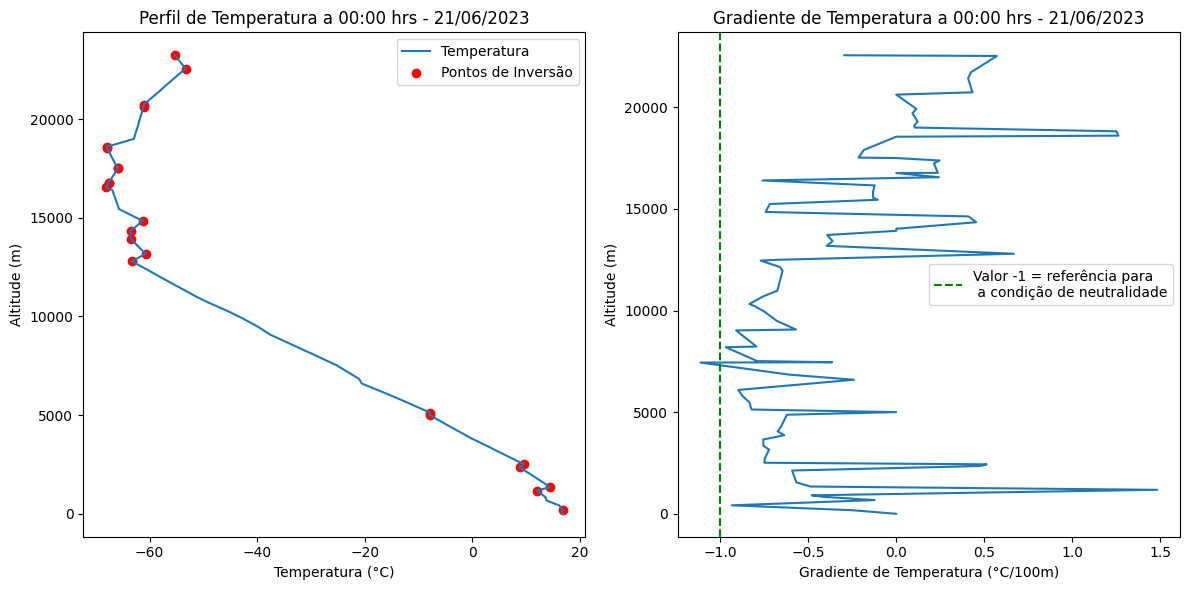

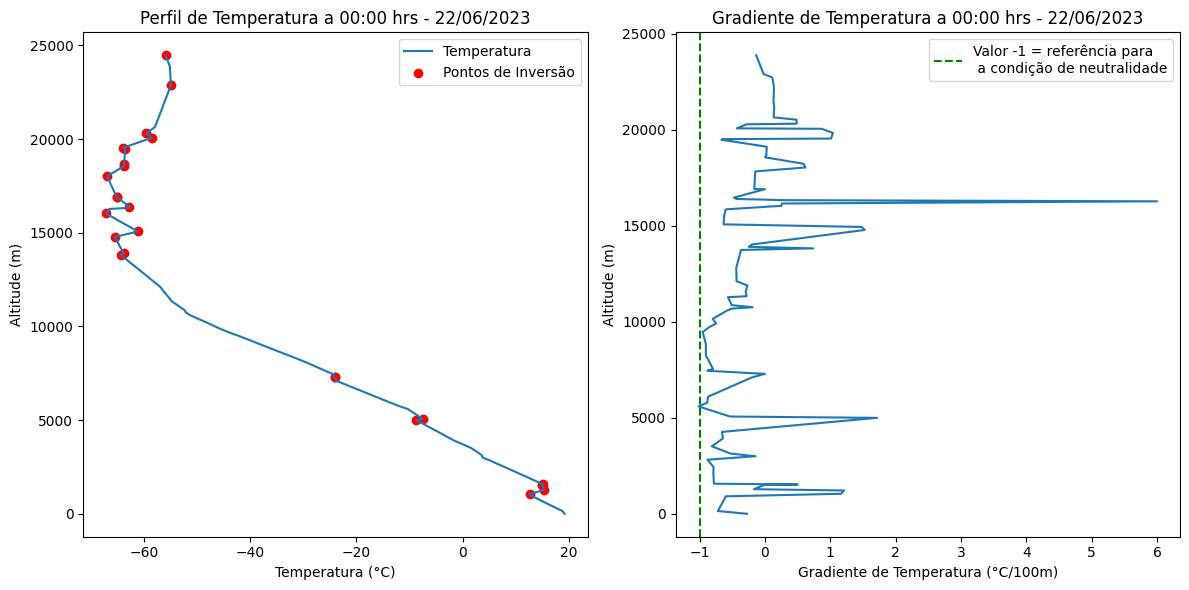

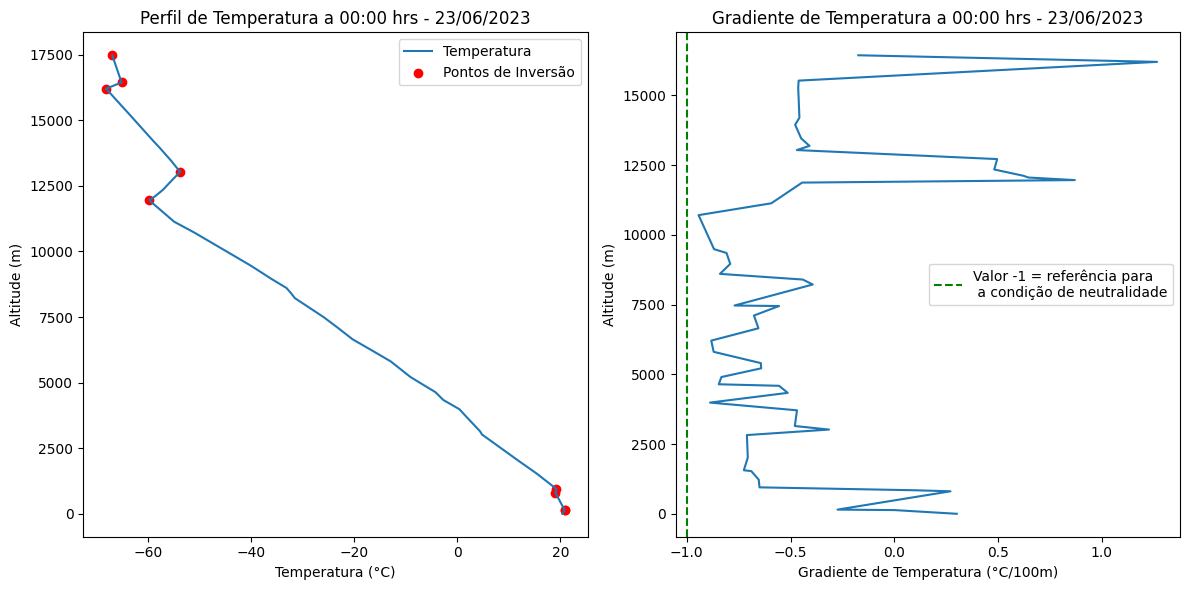

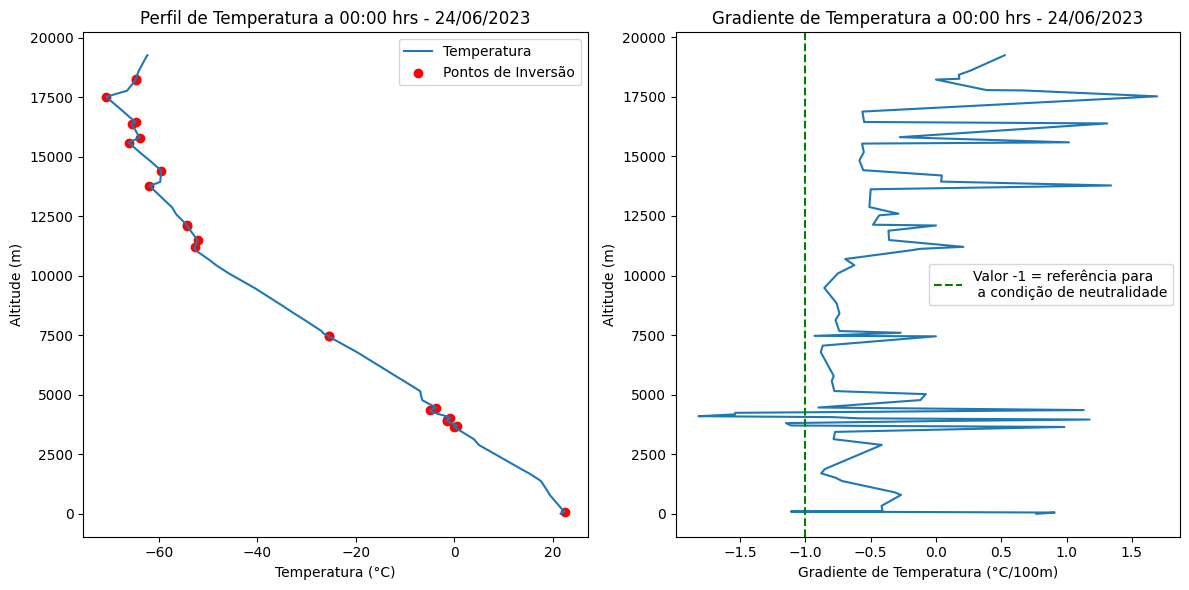

In [75]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir


#-----------------------------------------------------CÓDIGO PARA O HORÁRIO DE 12:00 HORAS------------------------------------------------------------ 
# Função para obter dados e plotar o perfil de temperatura com pontos de inversão e gradiente de temperatura
def plot_temperature_profile_and_gradient(date, station):
    # Extraindo os dados
    df = WyomingUpperAir.request_data(date, station)
    
    # Encontrando pontos de inversão
    temp = df['temperature'].values
    alt = df['height'].values
    pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
    
    # Calculando o gradiente de temperatura
    deltaT = np.diff(df['temperature'])
    deltaZ = np.diff(df['height'])
    dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m
    
    # Fazendo figura do perfil de temperatura com pontos de inversão
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Perfil de temperatura com pontos de inversão
    ax1.plot(temp, alt, label='Temperatura')
    ax1.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
    ax1.set_xlabel('Temperatura (°C)')
    ax1.set_ylabel('Altitude (m)')
    ax1.set_title(f'Perfil de Temperatura a 12:00 hrs - {date.strftime("%d/%m/%Y")}')
    ax1.legend()

    # Gradiente de temperatura
    ax2.plot(dTdZ, df['height'][:-1])
    ax2.axvline(x=-1, color='green', linestyle='--', label='Valor -1 = referência para \n a condição de neutralidade')
    ax2.set_xlabel('Gradiente de Temperatura (°C/100m)')
    ax2.set_ylabel('Altitude (m)')
    ax2.set_title(f'Gradiente de Temperatura a 12:00 hrs - {date.strftime("%d/%m/%Y")}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Data inicial para análise
start_date = datetime(2023, 6, 20, 12)
# Local da análise
station = 'SBFL'

# Gerar gráficos para 5 dias consecutivos
for i in range(5):
    date = start_date + timedelta(days=i)
    plot_temperature_profile_and_gradient(date, station)
#-----------------------------------------------------CÓDIGO PARA O HORÁRIO DE 00:00 HORAS------------------------------------------------------------ 
# Função para obter dados e plotar o perfil de temperatura com pontos de inversão e gradiente de temperatura
def plot_temperature_profile_and_gradient(date, station):
    # Extraindo os dados
    df = WyomingUpperAir.request_data(date, station)
    
    # Encontrando pontos de inversão
    temp = df['temperature'].values
    alt = df['height'].values
    pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
    
    # Calculando o gradiente de temperatura
    deltaT = np.diff(df['temperature'])
    deltaZ = np.diff(df['height'])
    dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m
    
    # Fazendo figura do perfil de temperatura com pontos de inversão
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Perfil de temperatura com pontos de inversão
    ax1.plot(temp, alt, label='Temperatura')
    ax1.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
    ax1.set_xlabel('Temperatura (°C)')
    ax1.set_ylabel('Altitude (m)')
    ax1.set_title(f'Perfil de Temperatura a 00:00 hrs - {date.strftime("%d/%m/%Y")}')
    ax1.legend()

    # Gradiente de temperatura
    ax2.plot(dTdZ, df['height'][:-1])
    ax2.axvline(x=-1, color='green', linestyle='--', label='Valor -1 = referência para \n a condição de neutralidade')
    ax2.set_xlabel('Gradiente de Temperatura (°C/100m)')
    ax2.set_ylabel('Altitude (m)')
    ax2.set_title(f'Gradiente de Temperatura a 00:00 hrs - {date.strftime("%d/%m/%Y")}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Data inicial para análise
start_date = datetime(2023, 6, 20, 0)
# Local da análise
station = 'SBFL'

# Gerar gráficos para 5 dias consecutivos
for i in range(5):
    date = start_date + timedelta(days=i)
    plot_temperature_profile_and_gradient(date, station)

Em meteorologia, uma inversão é um desvio da mudança normal de uma propriedade atmosférica com a altitude. Normalmente, a temperatura
do ar diminui com o aumento da altitude, mas durante uma inversão o ar mais quente é mantido acima do ar mais frio. A estabilidade 
atmosférica é determinada comparando-se a variação de temperatura de uma parcela de ar ascendente ou descendente com o
perfil de temperatura do ar ambiente. Numa camada de ar estável (onde a taxa de variação da temperatura é menor que 9.8°C/km), uma parcela
de ar ascendente torna-se mais fria que o ar ambiente ou uma parcela de ar descendente torna-se mais quente que o ar ambiente. Tanto num 
caso como no outro a parcela é forçada a retornar à sua altitude original. Numa camada de ar instável (onde a taxa de variação da temperatura
é maior que 9.8°C/km) uma parcela de ar ascendente torna-se mais quente que o ar ambiente e continua a subir e uma parcela de ar
descendente torna-se mais fria que o ar ambiente e continua a descer (Grimm, 1999).

## ITEM 03_SUPERFÍCIE 
Neste item são avaliados os siguintes itens:
* Turbulência;
* Altura da camada limite;
* Superficie do local de estudo utilizando o output da plataforma EZ-AERMET;
* Valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento;
* Figura com o recorte feito pela plataforma

 ------------------------------------- Nesta sessão é avaliada turbulência e a altura da camada limite em 2023 ------------------------------------------------

In [49]:
import pandas as pd

# Caminho para o arquivo CSV
caminho_arquivo = r'C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\inputs\ez_aermod_marilia\meteo_sfc_mod.csv'

# Abrir o arquivo CSV como um DataFrame do pandas, especificando o encoding
df = pd.read_csv(caminho_arquivo, encoding='latin1')

# Verificar o número total de linhas
print(f"Total de linhas no DataFrame: {len(df)}")

# Configurações para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Exibir DataFrame
display(df)

Total de linhas no DataFrame: 8784


,ano,mês,dia,dia_juliano,hora,calor_sens [W/m2],vel_atri [m/s],vel_convc [m/s],grad_temp[K/m],altura_mist_ convec [m],altura_mist_ convec_mec [m],MoninObukhov[m],comp_rug_sup[m],bowen,albedo,velo_vento[m/s],dir_vento[°],alt_anemometro[m],temp[K],temp[°C],alt_medicao[m],cod_prec,precip[mm/hr],umid_rela[%],pressao[mb],cob_nuvens,ajuste,interpolacao
0,23,1,1,1,1,-44.6,0.510,-9.0,-9.0,-999,875.0,268.4,0.7314,0.29,1.0,4.1,1,14,298.1,24.95,2,0,0,83,1010,6,NAD-SFC,NoSubs
1,23,1,1,1,2,-46.1,0.527,-9.0,-9.0,-999,917.0,286.0,0.7957,0.29,1.0,4.1,358,14,298.1,24.95,2,0,0,83,1010,6,NAD-SFC,NoSubs
2,23,1,1,1,3,-52.7,0.602,-9.0,-9.0,-999,1120.0,373.6,0.7957,0.29,1.0,4.6,354,14,298.1,24.95,2,0,0,83,1010,6,NAD-SFC,NoSubs
3,23,1,1,1,4,-59.1,0.676,-9.0,-9.0,-999,1332.0,471.1,0.7957,0.29,1.0,5.1,343,14,298.1,24.95,2,0,0,83,1010,6,NAD-SFC,NoSubs
4,23,1,1,1,5,-24.2,0.277,-9.0,-9.0,-999,570.0,79.1,0.7957,0.29,1.0,2.6,333,14,298.1,24.95,2,0,0,89,1010,6,NAD-SFC,NoSubs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,24,1,1,1,20,-999.0,-9.000,-9.0,-9.0,-999,NaN,NaN,-9.0000,-9.00,-9.0,999.0,999,-9,NaN,NaN,-9,0,0,999,99999,99,NAD,NoSubs
8780,24,1,1,1,21,-999.0,-9.000,-9.0,-9.0,-999,NaN,NaN,-9.0000,-9.00,-9.0,999.0,999,-9,NaN,NaN,-9,0,0,999,99999,99,NAD,NoSubs
8781,24,1,1,1,22,-999.0,-9.000,-9.0,-9.0,-999,NaN,NaN,-9.0000,-9.00,-9.0,999.0,999,-9,NaN,NaN,-9,0,0,999,99999,99,NAD,NoSubs
8782,24,1,1,1,23,-999.0,-9.000,-9.0,-9.0,-999,NaN,NaN,-9.0000,-9.00,-9.0,999.0,999,-9,NaN,NaN,-9,9999,-9,999,99999,99,NAD,NoSubs


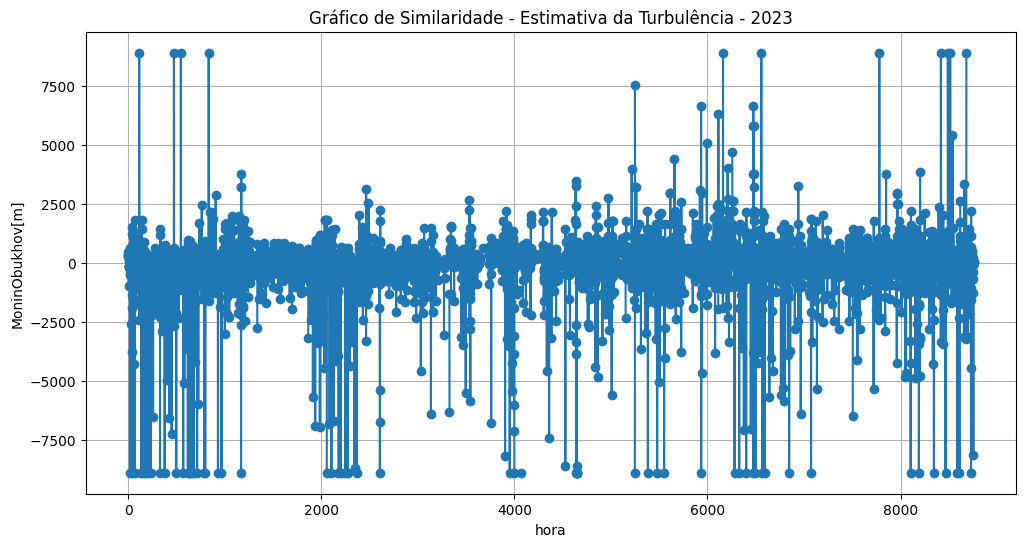

In [50]:
#Avaliando a turbulência pela teoria da similaridade de Monin-Obukhov

import matplotlib.pyplot as plt
# Selecionar a coluna para plotar
coluna_y = 'MoninObukhov[m]'  # Substitua pelo nome da coluna que deseja plotar

# Plotar os dados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[coluna_y], marker='o', linestyle='-')
plt.xlabel('hora')
plt.ylabel(coluna_y)
plt.title('Gráfico de Similaridade - Estimativa da Turbulência - 2023')
plt.grid(True)
plt.show()

Os valores de -9999 na coluna "MoninObukhov[m]" representam valores não calculados ou perdidos, portanto foram retirados da tabela acima. Mesmo assim, não é possível avaliar de forma adequada o comportamento da turbulencia pois a quandidade de dados "polui o gráfico". Dessa maneira, optamos por olhar o corpotamento de um dia para cada estação do ano de 2023 como pode ser observado abaixo.

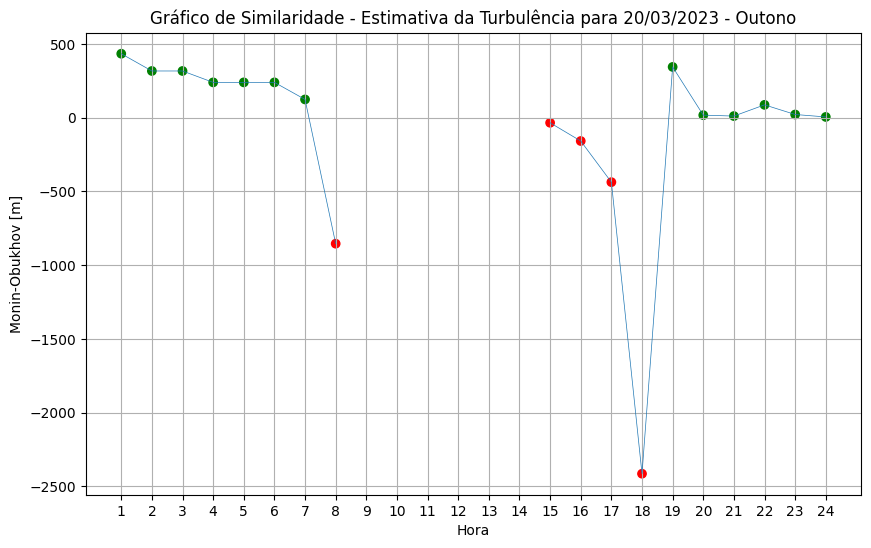

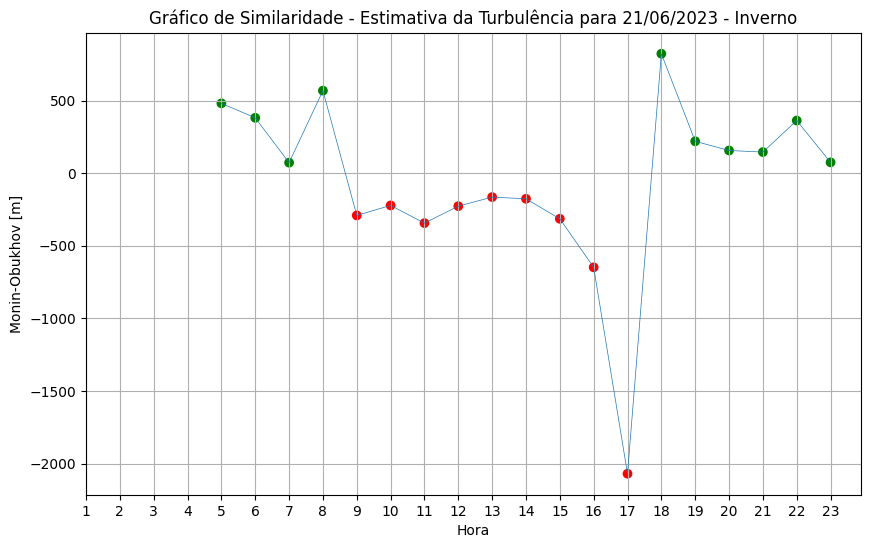

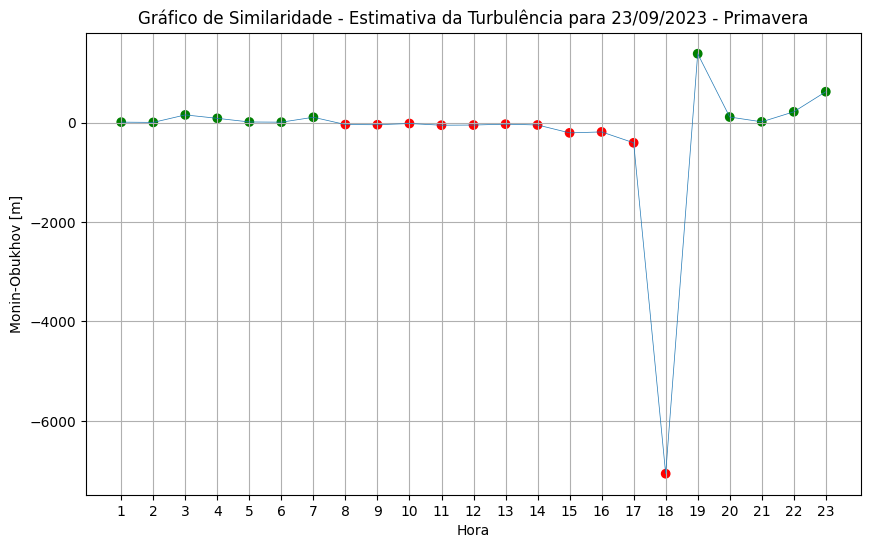

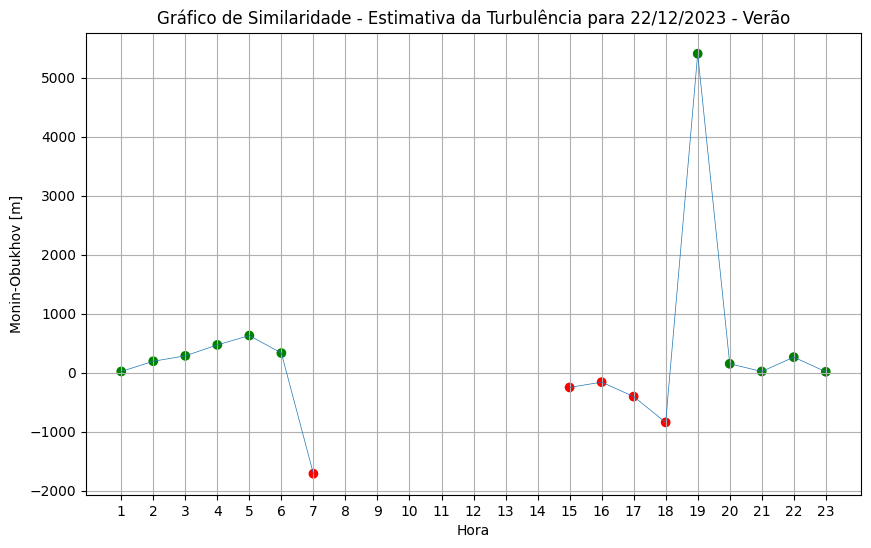

In [51]:
#------------------------------------------------------------OUTONO--------------------------------------------------------------------------------
# Definindo o intervalo de linhas [Corresponde a data 20/03/2023 - Outono]
inicio = 1872
fim = 1896

# Selecionando o intervalo de linhas
df_intervalo = df.iloc[inicio:fim]

# Escolher as colunas para o eixo x e y
coluna_x = 'hora'  
coluna_y = 'MoninObukhov[m]'  

# Configurar cores
colors = df_intervalo[coluna_y].apply(lambda y: 'red' if y < 0 else ('green' if y > 0 else 'gray'))

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(df_intervalo[coluna_x], df_intervalo[coluna_y], c=colors, marker='o')
plt.plot(df_intervalo[coluna_x], df_intervalo[coluna_y], linestyle='-', linewidth=0.5)  # Adiciona uma linha conectando os pontos
plt.xlabel('Hora')
plt.ylabel('Monin-Obukhov [m]')
plt.title('Gráfico de Similaridade - Estimativa da Turbulência para 20/03/2023 - Outono')

# Configurar os rótulos do eixo x para mostrar todos os valores
plt.xticks(ticks=df_intervalo[coluna_x], labels=df_intervalo[coluna_x])
plt.grid(True)
plt.show()
#------------------------------------------------------------INVERNO--------------------------------------------------------------------------------
# Definindo o intervalo de linhas [Corresponde a data 21/06/2023 - Inverno]
inicio = 4104
fim = 4127

# Selecionando o intervalo de linhas
df_intervalo = df.iloc[inicio:fim]

# Escolher as colunas para o eixo x e y
coluna_x = 'hora'  
coluna_y = 'MoninObukhov[m]'  

# Configurar cores
colors = df_intervalo[coluna_y].apply(lambda y: 'red' if y < 0 else ('green' if y > 0 else 'gray'))

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(df_intervalo[coluna_x], df_intervalo[coluna_y], c=colors, marker='o')
plt.plot(df_intervalo[coluna_x], df_intervalo[coluna_y], linestyle='-', linewidth=0.5)  # Adiciona uma linha conectando os pontos
plt.xlabel('Hora')
plt.ylabel('Monin-Obukhov [m]')
plt.title('Gráfico de Similaridade - Estimativa da Turbulência para 21/06/2023 - Inverno')

# Configurar os rótulos do eixo x para mostrar todos os valores
plt.xticks(ticks=df_intervalo[coluna_x], labels=df_intervalo[coluna_x])
plt.grid(True)
plt.show()
#------------------------------------------------------------PRIMAVERA--------------------------------------------------------------------------------
# Definindo o intervalo de linhas [Corresponde a data 23/09/2023 - Primavera]
inicio = 6360
fim = 6383

# Selecionando o intervalo de linhas
df_intervalo = df.iloc[inicio:fim]

# Escolher as colunas para o eixo x e y
coluna_x = 'hora'  
coluna_y = 'MoninObukhov[m]'  

# Configurar cores
colors = df_intervalo[coluna_y].apply(lambda y: 'red' if y < 0 else ('green' if y > 0 else 'gray'))

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(df_intervalo[coluna_x], df_intervalo[coluna_y], c=colors, marker='o')
plt.plot(df_intervalo[coluna_x], df_intervalo[coluna_y], linestyle='-', linewidth=0.5)  # Adiciona uma linha conectando os pontos
plt.xlabel('Hora')
plt.ylabel('Monin-Obukhov [m]')
plt.title('Gráfico de Similaridade - Estimativa da Turbulência para 23/09/2023 - Primavera')

# Configurar os rótulos do eixo x para mostrar todos os valores
plt.xticks(ticks=df_intervalo[coluna_x], labels=df_intervalo[coluna_x])
plt.grid(True)
plt.show()
#------------------------------------------------------------VERÃO--------------------------------------------------------------------------------
# Definindo o intervalo de linhas [Corresponde a data 22/12/2023 - Verão]
inicio = 8520
fim = 8543

# Selecionando o intervalo de linhas
df_intervalo = df.iloc[inicio:fim]

# Escolher as colunas para o eixo x e y
coluna_x = 'hora'  
coluna_y = 'MoninObukhov[m]'  

# Configurar cores
colors = df_intervalo[coluna_y].apply(lambda y: 'red' if y < 0 else ('green' if y > 0 else 'gray'))

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(df_intervalo[coluna_x], df_intervalo[coluna_y], c=colors, marker='o')
plt.plot(df_intervalo[coluna_x], df_intervalo[coluna_y], linestyle='-', linewidth=0.5)  # Adiciona uma linha conectando os pontos
plt.xlabel('Hora')
plt.ylabel('Monin-Obukhov [m]')
plt.title('Gráfico de Similaridade - Estimativa da Turbulência para 22/12/2023 - Verão')

# Configurar os rótulos do eixo x para mostrar todos os valores
plt.xticks(ticks=df_intervalo[coluna_x], labels=df_intervalo[coluna_x])
plt.grid(True)
plt.show()

Comentários:
* Os pontos marcados como verde correspondem a uma turbulencia em condição estável, já em vervelho estaria em condição instável.
* A intensidade e duração da incidência solar variam com as estações do ano, influenciando a quantidade de turbulência.
* No verão, a maior duração e intensidade da incidência solar resultam em maior turbulência diurna comparada ao inverno.
* Para os gráficos de outono e inverno faltaram alguns dados em certos intervalos, uma vez que estes correspondiam a
  valores como '-9999', que representam valores não calculados ou perdidos. Portanto desconsiderados nesta análise;
* Turbulência Instável: Promove a dispersão dos poluentes, diluindo suas concentrações e reduzindo episódios de alta poluição. Beneficia a qualidade do   ar ao nível do solo.
* Turbulência Estável: Limita a dispersão dos poluentes, levando a concentrações mais altas de poluição ao nível do solo e aumentando a probabilidade     de episódios de alta poluição.

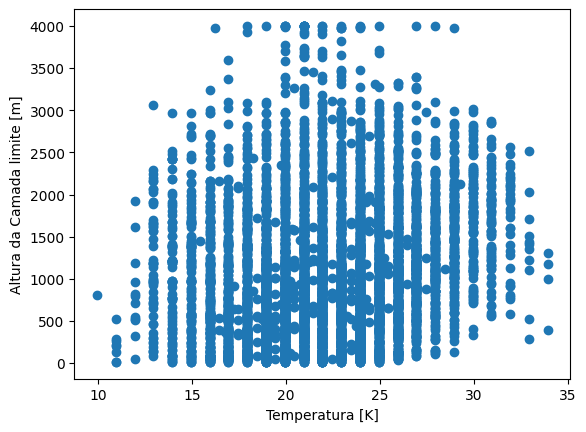

In [52]:
#Avaliando a altura da camada limite
import matplotlib.pyplot as plt

# Escolher as duas colunas que deseja plotar
coluna1 = 'temp[°C]'
coluna2 = 'altura_mist_ convec_mec [m]'

# Adicionar legenda e rótulos
plt.xlabel('Temperatura [K]')
plt.ylabel('Altura da Camada limite [m]')

# Plotar um gráfico de linhas com as duas colunas
plt.plot(df[coluna1], df[coluna2],'o' )


Comentários:

Quando caracterizamos a camada limite da atmosfera, alguns pontos precisam ser levados em consideração. Por exemplo, durante o dia, há um ciclo de aquecimento radiativo, que está associado a ciclos de fluxos de calor latente e calor sensível entre a Terra e o ar. Esse ciclo influencia a parte inferior da atmosfera, que está em contato com a superfície.

De acordo com o professor Ricardo Almeida, em sua aula sobre a camada limite (https://youtu.be/VArA_lmFHc0?si=N4gCUi63zpuMQ2Rh) , a troposfera atinge aproximadamente 11 km de altitude, e até cerca de 2 km é a região inferior da troposfera que sofre o efeito do ciclo de ondas influenciado por essas condições.

Ainda segundo ele, a camada limite da atmosfera tem um comportamento diferente das demais camadas, principalmente devido à turbulência.

Ao observar o gráfico gerado, e destacando que as medições foram feitas até 4 mil metros, ele não apresentou um comportamento adequado para análise comparativa com os gráficos apresentados em sala de aula. Para uma atmosfera estaticamente estável, o perfil de temperatura deveria aumentar à medida que a altitude aumenta. O que podemos perceber é que, para uma determinada porção de ar, há um comportamento uniforme, podendo inferir que pode estar ocorrendo homogeneização das propriedades na camada limite, tendendo a homogeneizar a temperatura potencial, resultado de uma turbulência elevada.

--------------- Nessa etapa é avaliada a superficie do local através da observação dos valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento e apresentando a figura com o recorte feito pela plataforma-----------------------------------------------------------------


In [53]:
#Apresentando a tabela dos valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento
# Caminho para o arquivo CSV
caminho_arquivo = r'C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\inputs\ez_aermod_marilia\landUseCharportobello.csv'

# Abrir o arquivo CSV como um DataFrame do pandas, especificando o encoding
df = pd.read_csv(caminho_arquivo, encoding='latin1')
 
# Configurações para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Exibir DataFrame
display(df)

,Unnamed: 0,z0_primavera,z0_verão,z0_outono,z0_inverno,alb_primavera,alb_verão,alb_outono,alb_inverno,bo_primavera,bo_verão,bo_outono,bo_inverno,Sectores
0,0,0.682931,0.696549,0.666509,0.666509,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,90
1,1,0.847253,0.855292,0.840821,0.840821,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,135
2,2,0.852430,0.860028,0.846351,0.846351,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,180
3,3,0.822493,0.831259,0.815480,0.815480,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,225
4,4,0.863255,0.870452,0.857498,0.857498,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,270
5,5,0.795671,0.802883,0.785688,0.785688,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,315
6,6,0.789986,0.798923,0.777733,0.777733,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,45
7,7,0.731398,0.742765,0.722303,0.722303,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,0


-------------------------------------------------------------------Avaliando os dados de rugosidade--------------------------------------------------------------

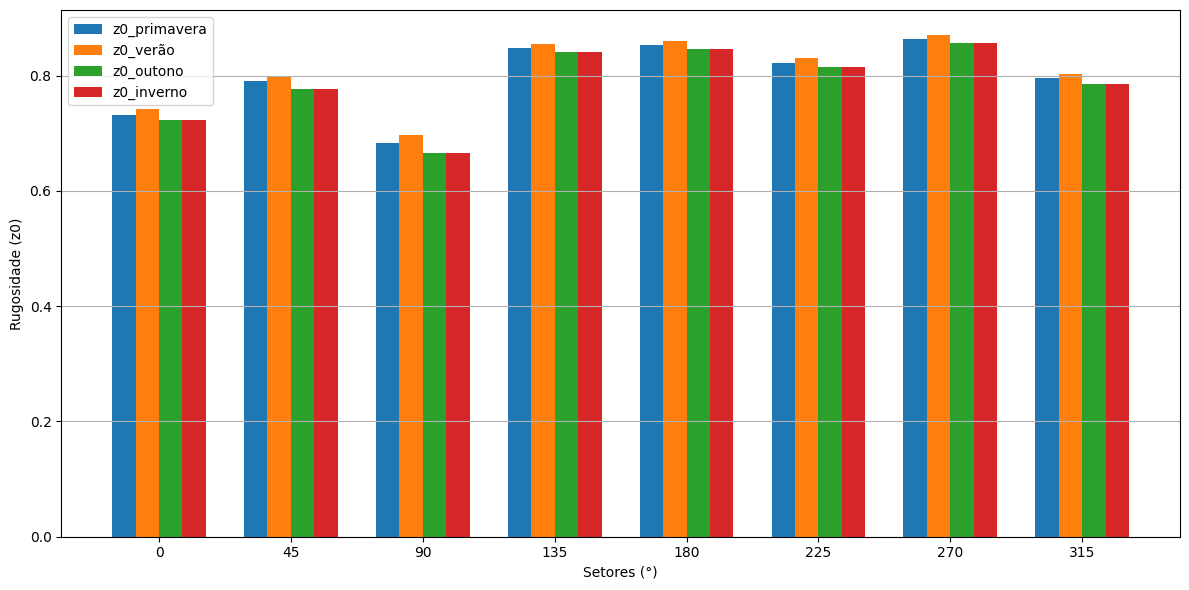

In [54]:
# Selecionar as colunas para plotar
coluna_x = 'Sectores'
colunas_y = ['z0_primavera', 'z0_verão', 'z0_outono', 'z0_inverno']

# Obter os valores únicos da coluna x para usar como ticks do eixo x
valores_x = df[coluna_x].unique()

# Plotar os dados como um gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
n_colunas = len(colunas_y)
largura_barra = 8  # Largura das barras
for i, coluna_y in enumerate(colunas_y):
    deslocamento = largura_barra * (i - n_colunas / 2 + 0.5)  # Calcular o deslocamento das barras para agrupá-las
    plt.bar(valores_x + deslocamento, df[coluna_y], width=largura_barra, label=coluna_y)

plt.xlabel('Setores (°)')
plt.ylabel('Rugosidade (z0)')
plt.grid(True, axis='y')
plt.xticks(valores_x)
plt.legend()
plt.tight_layout()
plt.show()

Comentários:
* Analisando a rugosidade em relação aos setores, nota-se que entre 135° até 315° ela é maior que 0.8. Nesse intervalo
  também pode-se obeservar que, na última figura apresentada, há uma maior cobertura do solo representa por área urbana. Sabe-se que
  a presença de edifícios, ruas, e outros obstáculos pode aumentar a rugosidade, tornando o fluxo de ar mais turbulento e complexo por exemplo.
* Por outro lado, olhando o gráfico em função das estações do ano, não há uma variabilidade muito alta em relação a elas. Em áreas urbanas, onde os
  elementos do ambiente são mais estáveis ao longo do ano, como edifícios e ruas, a rugosidade pode não variar muito entre as estações.
  

-------------------------------------------------------------------Avaliando os dados de albedo--------------------------------------------------------------

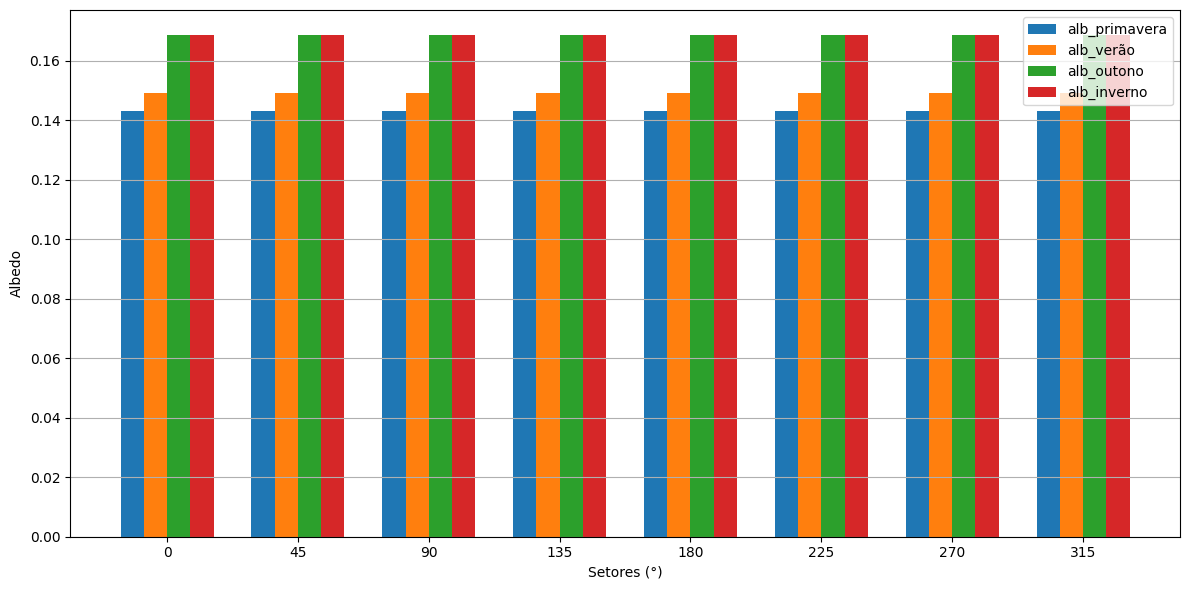

In [55]:
# Selecionar as colunas para plotar
coluna_x = 'Sectores'
colunas_y = ['alb_primavera', 'alb_verão', 'alb_outono', 'alb_inverno']

# Obter os valores únicos da coluna x para usar como ticks do eixo x
valores_x = df[coluna_x].unique()

# Plotar os dados como um gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
n_colunas = len(colunas_y)
largura_barra = 8  # Largura das barras
for i, coluna_y in enumerate(colunas_y):
    deslocamento = largura_barra * (i - n_colunas / 2 + 0.5)  # Calcular o deslocamento das barras para agrupá-las
    plt.bar(valores_x + deslocamento, df[coluna_y], width=largura_barra, label=coluna_y)

plt.xlabel('Setores (°)')
plt.ylabel('Albedo')
plt.grid(True, axis='y')
plt.xticks(valores_x)
plt.legend()
plt.tight_layout()
plt.show()

Comentários:
* A variação do albedo com a cobertura do solo pode ocorrer devido a diferentes tipos de vegetação e diferentes 
  materiais de construção urbana, por exemplo. Entretanto, para todos os quadrantes avaliados, o valor de albedo se manteve
  costante. Podemos inferir que não houve muita mudança no uso e ocupação do solo no ano de 2023. 
* Por outro lado, olhando o gráfico em função das estações do ano, nota-se que o albedo para o outono e inverno são mais autos que na primavera e verão.
  Alguns exemplos de situações que podem influenciar nesse caso são:
    * O ângulo mais agudo de incidência solar durante o outono e inverno contribui para uma maior reflexão da luz solar;
    * A cobertura de nuvens também pode variar sazonalmente, com nuvens mais espessas e frequentes no outono e inverno 
      refletindo mais luz solar, aumentando o albedo.


-------------------------------------------------------------------Avaliando os dados da razão de Bowen--------------------------------------------------------------

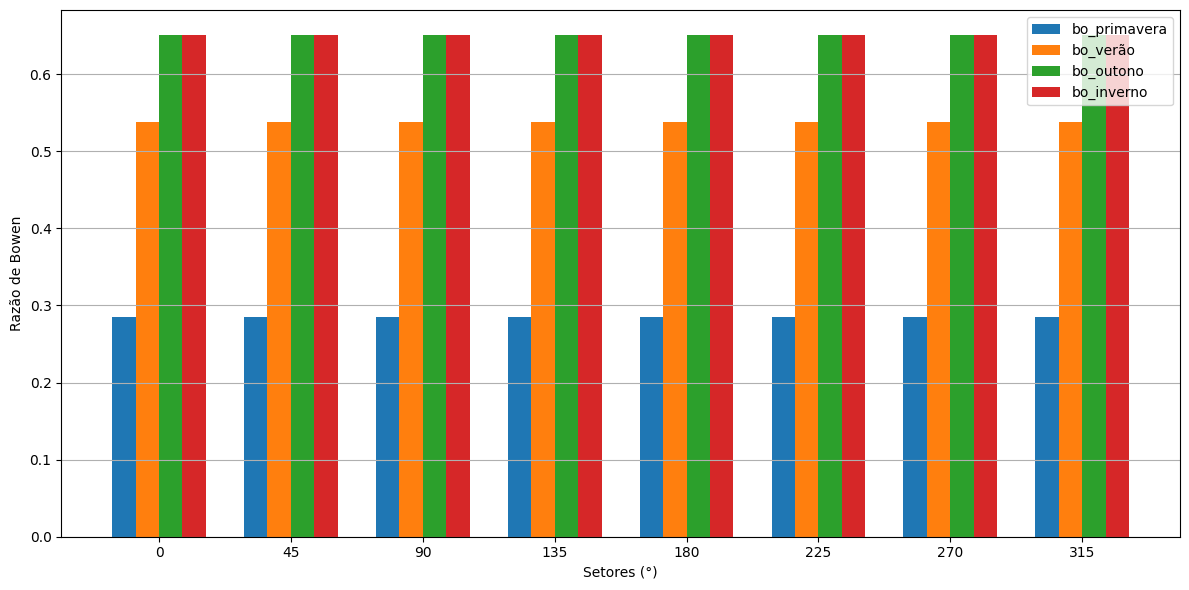

In [56]:
# Selecionar as colunas para plotar
coluna_x = 'Sectores'
colunas_y = ['bo_primavera', 'bo_verão', 'bo_outono', 'bo_inverno']

# Obter os valores únicos da coluna x para usar como ticks do eixo x
valores_x = df[coluna_x].unique()

# Plotar os dados como um gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
n_colunas = len(colunas_y)
largura_barra = 8  # Largura das barras
for i, coluna_y in enumerate(colunas_y):
    deslocamento = largura_barra * (i - n_colunas / 2 + 0.5)  # Calcular o deslocamento das barras para agrupá-las
    plt.bar(valores_x + deslocamento, df[coluna_y], width=largura_barra, label=coluna_y)

plt.xlabel('Setores (°)')
plt.ylabel('Razão de Bowen')
plt.grid(True, axis='y')
plt.xticks(valores_x)
plt.legend()
plt.tight_layout()
plt.show()

Comentários:
* Primavera: A razão de Bowen na primavera é mais baixa do que nas outras estações do ano principalmente devido ao 
  aumento da evaporação da água dos solos e da vegetação, causado pelo aumento da temperatura. Esse aumento na evaporação 
  significa que uma maior parte da energia solar é utilizada para evaporar a água, reduzindo o calor sensível disponível. Além disso, 
  no início da primavera, a diferença de temperatura entre a superfície terrestre e o ar não é tão grande quanto no inverno, o que 
  também contribui para a redução da razão de Bowen.
* Verão: A razão de Bowen no verão é geralmente mais alta do que na primavera, principalmente devido à maior diferença de temperatura entre a 
  superfície terrestre aquecida e o ar. Isso significa que há mais calor sensível disponível para transferência do solo para o ar. Além disso, 
  a taxa de evaporação da água dos solos e da vegetação aumenta no verão devido ao aumento da temperatura, o que também contribui para um aumento
  do calor latente.
* Outono e Inverno: No outono e inverno, a razão de Bowen é mais alta do que nas outras estações devido à menor evaporação da água devido às baixas
  temperaturas. Isso significa que menos energia solar é utilizada para evaporar a água, resultando em mais calor sensível disponível. Além disso, a
  diferença de temperatura entre a superfície terrestre e o ar é maior nessas estações, aumentando ainda mais o calor sensível. A razão de Bowen pode
  ser igual entre o outono e o inverno, como observado no gráfico, devido à continuidade desses fatores ao longo dessas estações, como a baixa
  evaporação e a maior diferença de temperatura.

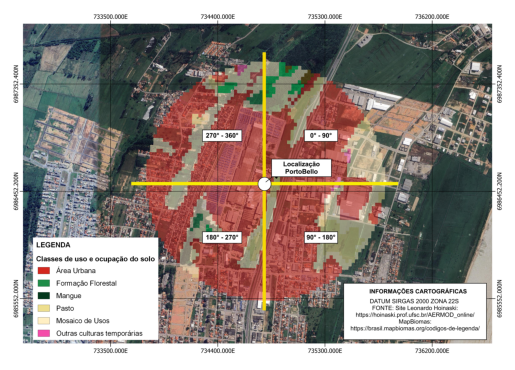

In [57]:
#Mostrando imagem de raster criada no Qgis.
#A legenda de usos e ocupação do loso foram baseadas no site do MapBiomas Brasil https://brasil.mapbiomas.org/codigos-de-legenda/import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho para o arquivo de imagem
caminho_arquivo = r'C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\inputs\ez_aermod_marilia\uso_solo.png'

# Abrir a imagem
imagem = mpimg.imread(caminho_arquivo)

# Mostrar a imagem
plt.imshow(imagem)
plt.axis('off')  # Remove os eixos
plt.show()

Comentários: 
* Nota-se que a maior parcela de cobertura é representada pela Área Urbana. 
* Poucas marcações de formação florestal são identificadas
